In [1]:
import pandas as pd
import os

In [2]:
speeches = pd.read_parquet('src/Data/ecb-speeches.parquet')
releases = pd.read_csv("src/Data/ecb_releases_302.csv")
announcements = pd.read_csv("src/Data/policy_announcements.csv")

In [4]:
# remove the observations that are earlier than 2005
speeches = speeches[speeches['date'] >= '2005-01-01']
speeches

,date,content
262,2005-01-17,European Central Bank: Press conference - intr...
263,2005-01-26,Jean-Claude Trichet: The euro - successes and ...
264,2005-02-03,Jean-Claude Trichet: Interview with Les Echos ...
265,2005-02-03,"Jean-Claude Trichet: Communication, transparen..."
266,2005-02-03,European Central Bank: Press conference on the...
...,...,...
2250,2022-02-15,Christine Lagarde: 20th anniversary of the ent...
2251,2022-02-17,Christine Lagarde: Introductory statement - Eu...
2252,2022-02-23,Frank Elderson: Prudential pathways to Paris C...
2253,2022-02-23,Frank Elderson: Towards an immersive superviso...


In [5]:
import pandas as pd

def descriptive_statistics_to_latex(df):
    # Extract year and month from 'date' column
    df['year'] = pd.to_datetime(df['date']).dt.year
    df['month'] = pd.to_datetime(df['date']).dt.month
    
    # Frequency of speeches by month for each year
    monthly_count = df.groupby(['year', 'month']).size().unstack(fill_value=0)
    
    # Adding a column for yearly total
    monthly_count['Total'] = monthly_count.sum(axis=1)
    
    # Rename month columns for clarity
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_count.columns = month_names + ['Total']
    
    # Add a row for monthly total
    monthly_count.loc['Total', :] = monthly_count.sum(axis=0)
    
    # Convert the DataFrame to integer type
    monthly_count = monthly_count.astype(int)
    
    # Convert to LaTeX format
    latex_output = monthly_count.to_latex()

    return latex_output

# create a latex table using the function
latex_table = descriptive_statistics_to_latex(speeches)
print(latex_table)


/tmp/ipykernel_24506/2513888785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['date']).dt.year
/tmp/ipykernel_24506/2513888785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['date']).dt.month


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & Jan & Feb & Mar & Apr & May & Jun & Jul & Aug & Sep & Oct & Nov & Dec & Total \\
year &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
2005 & 2 & 5 & 6 & 6 & 4 & 10 & 2 & 1 & 3 & 4 & 3 & 5 & 51 \\
2006 & 3 & 3 & 5 & 5 & 10 & 6 & 5 & 2 & 1 & 6 & 6 & 6 & 58 \\
2007 & 3 & 4 & 4 & 7 & 7 & 11 & 6 & 3 & 7 & 14 & 10 & 12 & 88 \\
2008 & 14 & 9 & 10 & 17 & 12 & 11 & 10 & 2 & 21 & 13 & 16 & 14 & 149 \\
2009 & 11 & 11 & 11 & 11 & 4 & 20 & 8 & 2 & 16 & 9 & 17 & 10 & 130 \\
2010 & 7 & 6 & 12 & 16 & 11 & 16 & 6 & 1 & 8 & 18 & 13 & 7 & 121 \\
2011 & 8 & 12 & 11 & 6 & 19 & 19 & 8 & 4 & 12 & 17 & 15 & 8 & 139 \\
2012 & 1 & 6 & 8 & 12 & 11 & 8 & 5 & 7 & 10 & 14 & 12 & 9 & 103 \\
2013 & 8 & 11 & 10 & 14 & 14 & 15 & 12 & 4 & 15 & 19 & 16 & 14 & 152 \\
2014 & 8 & 12 & 9 & 13 & 13 & 9 & 14 & 3 & 20 & 10 & 16 & 3 & 130 \\
2015 & 12 & 8 & 12 & 15 & 11 & 9 & 6 & 3 & 13 & 17 & 22 & 8 & 136 \\
2016 & 13 & 12 & 10 & 11 & 12 & 17 & 3 & 2 & 8 & 5 & 14 & 13 & 120 \\
2017

In [5]:
import pandas as pd

def consolidate_lines(df):
    """
    Consolidate lines in the content of a dataframe.
    If a line does not end with a full stop, it is merged
    with the next line, removing unnecessary newline characters.

    Args:
        df (pandas.DataFrame): Dataframe with 'content' column

    Returns:
        pandas.DataFrame: Modified dataframe with consolidated lines
    """
    consolidated_data = []

    for index, row in df.iterrows():
        content = row['content']
        lines = content.split('\n')
        consolidated_content = ""
        for i, line in enumerate(lines):
            line = line.strip()
            if line and (line[-1] in ".!?" or i == len(lines) - 1):
                consolidated_content += line + " "  # Append a space after each line
            else:
                consolidated_content += line + " "  # Append a space to separate lines

        consolidated_row = row.copy()
        consolidated_row['content'] = consolidated_content.strip()
        consolidated_data.append(consolidated_row)

    # Create new dataframe with consolidated content
    new_df = pd.DataFrame(consolidated_data)

    return new_df



import re

def split_paragraphs(df):
    """
    Splits content of dataframe into separate rows. 
    If a paragraph exceeds 512 words, it is limited to 
    two nearly equal parts, with the split done at a full stop.
    
    Args:
        df (pandas.DataFrame): Dataframe with 'date' and 'content' columns
    
    Returns:
        pandas.DataFrame: Modified dataframe with split content
    """
    data = []

    for index, row in df.iterrows():
        date = row['date']
        content = row['content']

        # Split content into sentences
        sentences = re.split(r'(?<=[.!?])\s+', content)

        # Process each sentence
        current_part = ""
        for sentence in sentences:
            if len(current_part.split()) + len(sentence.split()) <= 250:
                current_part += " " + sentence
            else:
                if current_part.strip():
                    data.append([date, current_part.strip()])
                current_part = sentence

        # Append remaining part if exists
        if current_part.strip():
            data.append([date, current_part.strip()])

    # Create new dataframe
    new_df = pd.DataFrame(data, columns=['date', 'content'])

    return new_df

# clean the content column and remove stopwords
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Replace newline characters with space
    text = text.replace('\n', ' ')
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Strip extra whitespaces
    text = ' '.join(text.split())
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ozodbek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
speeches_consolidated = consolidate_lines(speeches)
speeches_consolidated = split_paragraphs(speeches_consolidated)
speeches_consolidated['content_clean'] = speeches_consolidated['content'].apply(clean_text)
speeches_consolidated

,date,content,content_clean
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,mr duisenberg reports outcome second meeting g...
1,1998-07-17,As regards monetary and financial developments...,regards monetary financial developments euro a...
2,1998-07-17,I would not at the present time want to try to...,would present time want try convey strong impr...
3,1998-07-17,The committees are as follows (listed in alpha...,committees follows listed alphabetical order a...
4,1998-07-17,In the light of the potential burden which a m...,light potential burden minimum reserve system ...
...,...,...,...
27007,2022-02-25,Frank Elderson: Towards a stronger Anti-Money ...,frank elderson towards stronger antimoney laun...
27008,2022-02-25,"However, as my ECB Supervisory Board colleague...",however ecb supervisory board colleague edouar...
27009,2022-02-25,Good and efficient cooperation with AML/CFT su...,good efficient cooperation amlcft supervisory ...
27010,2022-02-25,My colleagues will give more details on the ma...,colleagues give details main themes ecb opinio...


In [7]:
# create counts column that counts words in content column of each row
speeches_consolidated['counts'] = speeches_consolidated['content'].str.split().str.len()

# remove observations with missing values and counts of less than 50
speeches_consolidated = speeches_consolidated[(speeches_consolidated['counts']>=20) & (speeches_consolidated['counts']<300)]

In [8]:
speeches_consolidated

,date,content,content_clean,counts
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,mr duisenberg reports outcome second meeting g...,230
1,1998-07-17,As regards monetary and financial developments...,regards monetary financial developments euro a...,231
2,1998-07-17,I would not at the present time want to try to...,would present time want try convey strong impr...,224
3,1998-07-17,The committees are as follows (listed in alpha...,committees follows listed alphabetical order a...,214
4,1998-07-17,In the light of the potential burden which a m...,light potential burden minimum reserve system ...,231
...,...,...,...,...
27007,2022-02-25,Frank Elderson: Towards a stronger Anti-Money ...,frank elderson towards stronger antimoney laun...,235
27008,2022-02-25,"However, as my ECB Supervisory Board colleague...",however ecb supervisory board colleague edouar...,250
27009,2022-02-25,Good and efficient cooperation with AML/CFT su...,good efficient cooperation amlcft supervisory ...,246
27010,2022-02-25,My colleagues will give more details on the ma...,colleagues give details main themes ecb opinio...,245


## Import Transformers


In [9]:
from transformers import AutoTokenizer

# Define the tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [10]:
import nltk
nltk.download('punkt')
from transformers import pipeline

import transformers

classifier = pipeline(
    "text-classification",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased",
)


[nltk_data] Downloading package punkt to /home/ozodbek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-09-22 12:23:40.798506: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-22 12:23:43.648785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 12:23:50.529864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
import pandas as pd
from functions import calculate_sentiment_distilbert

max_chunk_length = 512

# Create an empty DataFrame
df = pd.DataFrame()

# add content
df['content'] = speeches_consolidated['content'].head(10)

# Apply the sentiment analysis function to the 'content' column for the first 10 rows
df[['positive', 'negative']] = speeches_consolidated['content'].head(10).apply(
    lambda x: pd.Series(calculate_sentiment_distilbert(x))
)
# Print the updated DataFrame
print(df)


                                             content  positive  negative
0  Mr. Duisenberg reports on the outcome of the s...  0.915719  0.084281
1  As regards monetary and financial developments...  0.982149  0.017851
2  I would not at the present time want to try to...  0.997369  0.002631
3  The committees are as follows (listed in alpha...  0.955189  0.044811
4  In the light of the potential burden which a m...  0.948584  0.051416
5  For this purpose, the Governing Council adopte...  0.912827  0.087173
6  The Governing Council furthermore agreed that ...  0.939893  0.060107
7  (c) Payment systems issues The Governing Counc...  0.899928  0.100072
8  The Governing Council also agreed that a repor...  0.787863  0.212137
9  Mr. Duisenberg’s opening statement at the meet...  0.751468  0.248532


In [12]:
# Define the start and end dates of the desired date range
start_date = '2008-09-01'
end_date = '2008-09-30'

# Filter the DataFrame based on the date range
subset_df = speeches[(speeches['date'] >= start_date) & (speeches['date'] <= end_date)]

# Apply the sentiment analysis function to the 'content' column for the subset
subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))

# Print the updated subset DataFrame
print(subset_df)


           date                                            content  year  \
544  2008-09-03  Gertrude Tumpel-Gugerell: Start of the ECB/ESC...  2008   
545  2008-09-04  Gertrude Tumpel-Gugerell: Moving ahead with th...  2008   
546  2008-09-09  European Central Bank: Press conference – intr...  2008   
547  2008-09-09  Jürgen Stark: Monetary policy during the finan...  2008   
548  2008-09-09  Jean-Claude Trichet: Risk and the macro-econom...  2008   
549  2008-09-09  José Manuel González-Páramo: Globalisation, ma...  2008   
550  2008-09-10  Jürgen Stark: Economic perspectives and moneta...  2008   
551  2008-09-10  Gertrude Tumpel-Gugerell: What is the role of ...  2008   
552  2008-09-11  José Manuel González-Páramo: Some lessons from...  2008   
553  2008-09-11  Jean Claude-Trichet: Hearing before the Econom...  2008   
554  2008-09-11  Gertrude Tumpel-Gugerell: SEPA for cards Speec...  2008   
555  2008-09-15  Gertrude Tumpel-Gugerell: EU priorities for in...  2008   
556  2008-09

/tmp/ipykernel_7536/2845404510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))
/tmp/ipykernel_7536/2845404510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['positive', 'negative']] = subset_df['content'].apply(lambda x: pd.Series(calculate_sentiment_distilbert(x)))


# Speeches with FinBERT

In [13]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [14]:
# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')


In [15]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

sentiment = pipe()
sentiment

TypeError: __call__() missing 1 required positional argument: 'inputs'

/tmp/ipykernel_6673/1113428978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[['positive', 'negative']] = subset['content'].head(10).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_6673/1113428978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[['positive', 'negative']] = subset['content'].head(10).apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))
/tmp/ipykernel_6673/1113428978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,date,content,counts,positive,negative,neutral
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,50,0.937748,0.041710,0.020542
1,1998-07-17,The general picture is one of continued econom...,34,0.034190,0.034694,0.931116
2,1998-07-17,"As far as pricedevelopments are concerned, inf...",49,0.030530,0.951551,0.017919
3,1998-07-17,Economic growth has been driven increasingly b...,35,0.883557,0.097784,0.018659
4,1998-07-17,The favourable conjunctural situation has star...,49,0.101933,0.880079,0.017988
5,1998-07-17,As regards monetary and financial developments...,49,0.447888,0.532956,0.019157
6,1998-07-17,"In principle, the economic performance I have ...",45,0.489348,0.406243,0.104409
7,1998-07-17,"In this respect, I should like to underline th...",34,0.719490,0.179986,0.100524
8,1998-07-17,"Second, most Member States need togo a step fu...",29,0.036569,0.946498,0.016933
9,1998-07-17,This implies that the benchmark for fiscalpoli...,30,0.324513,0.065784,0.609703


# Starting with press releases


In [ ]:
# Starting with press releases
import pandas as pd
press_releases = pd.read_csv("src/Data/ecb_releases_302.csv")
announcements = pd.read_csv("src/Data/policy_announcements.csv")

In [ ]:
press_releases = pd.concat([press_releases, announcements], axis=0)
press_releases.reset_index(drop=True, inplace=True)
press_releases


,date,content
0,10 August 2023,10 August 2023\nEuropa Open Air 2023 celebrate...
1,5 July 2023,5 July 2023\nCompared with April 2023:\nconsum...
2,4 July 2023,4 July 2023\nCredit terms and conditions tight...
3,28 June 2023,28 June 2023\nProposed legislation establishes...
4,22 June 2023,22 June 2023\nThe aggregate of total assets of...
...,...,...
591,8 May 2014,"At today’s meeting, which was held in Brussels..."
592,3 April 2014,At today’s meeting the Governing Council of th...
593,6 March 2014,At today’s meeting the Governing Council of th...
594,6 February 2014,At today’s meeting the Governing Council of th...


In [ ]:

# Convert date column to datetime format
press_releases['date'] = pd.to_datetime(press_releases['date'], format='%d %B %Y')

# Convert date to "DD-MM-YYYY" format
press_releases['date'] = press_releases['date'].dt.strftime('%d-%m-%Y')

# Remove new line characters, replace with space
press_releases['content'] = press_releases['content'].str.replace('\n', ' ')

press_releases

,date,content
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...
1,05-07-2023,5 July 2023 Compared with April 2023: consumer...
2,04-07-2023,4 July 2023 Credit terms and conditions tighte...
3,28-06-2023,28 June 2023 Proposed legislation establishes ...
4,22-06-2023,22 June 2023 The aggregate of total assets of ...
...,...,...
591,08-05-2014,"At today’s meeting, which was held in Brussels..."
592,03-04-2014,At today’s meeting the Governing Council of th...
593,06-03-2014,At today’s meeting the Governing Council of th...
594,06-02-2014,At today’s meeting the Governing Council of th...


In [ ]:
import re
def split_paragraphs(df):
    """
    Splits content of dataframe into separate rows. 
    If a paragraph exceeds 512 words, it is limited to 
    two nearly equal parts, with the split done at a full stop.
    
    Args:
        df (pandas.DataFrame): Dataframe with 'date' and 'content' columns
    
    Returns:
        pandas.DataFrame: Modified dataframe with split content
    """
    data = []

    for index, row in df.iterrows():
        date = row['date']
        content = row['content']

        # Split content into sentences
        sentences = re.split(r'(?<=[.!?])\s+', content)

        # Process each sentence
        current_part = ""
        for sentence in sentences:
            if len(current_part.split()) + len(sentence.split()) <= 150:
                current_part += " " + sentence
            else:
                if current_part.strip():
                    data.append([date, current_part.strip()])
                current_part = sentence

        # Append remaining part if exists
        if current_part.strip():
            data.append([date, current_part.strip()])

    # Create new dataframe
    new_df = pd.DataFrame(data, columns=['date', 'content'])

    return new_df

In [ ]:
press_releases_long = consolidate_lines(press_releases)
press_releases_long = split_paragraphs(press_releases)
press_releases_long["content_clean"] = press_releases_long["content"].apply(clean_text)
press_releases_long

,date,content,content_clean
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...,10 august 2023 europa open air 2023 celebrates...
1,05-07-2023,5 July 2023 Compared with April 2023: consumer...,5 july 2023 compared april 2023 consumer infla...
2,05-07-2023,The increase in expected nominal income growth...,increase expected nominal income growth mainly...
3,05-07-2023,The decline in expectations was driven by resp...,decline expectations driven respondents aged 5...
4,05-07-2023,"and Kenny, G., “Household spending and fiscal ...",kenny g “household spending fiscal support cov...
...,...,...,...
1021,08-05-2014,"At today’s meeting, which was held in Brussels...",today’s meeting held brussels governing counci...
1022,03-04-2014,At today’s meeting the Governing Council of th...,today’s meeting governing council ecb decided ...
1023,06-03-2014,At today’s meeting the Governing Council of th...,today’s meeting governing council ecb decided ...
1024,06-02-2014,At today’s meeting the Governing Council of th...,today’s meeting governing council ecb decided ...


In [ ]:
subset = press_releases_long['content'].head(10).tolist()
subset

['10 August 2023 Europa Open Air 2023 celebrates Europe’s diversity in Frankfurt Over 12,000 guests expected for musical evening on waterfront On Thursday, 31 August 2023 the European Central Bank (ECB), together with broadcaster Hessischer Rundfunk, will once again present the traditional Europa Open Air concert with the Hessischer Rundfunk orchestra, Frankfurt Radio Symphony. The popular concert at Frankfurt’s waterfront location Weseler Werft will allow spectators to enjoy some of Europe’s finest concert pieces, with “celebrating Europe” as the theme. This year the event coincides with the 25th anniversary of the ECB. “Europa Open Air reflects the ECB’s commitment as a European institution and as a member of the local community. Music, literature and the performing and fine arts know no borders; they allow us to be united in diversity,” said ECB President Christine Lagarde.',
 'The evening will start with a performance by the Frankfurt Radio Big Band, accompanied by soul singer Joy 

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


sentiments = pipe(subset)

sentiments

2023-09-02 11:43:10.635222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-02 11:43:18.876548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[{'label': 'neutral', 'score': 0.743184506893158},
 {'label': 'neutral', 'score': 0.9470413327217102},
 {'label': 'negative', 'score': 0.9648347496986389},
 {'label': 'negative', 'score': 0.9272911548614502},
 {'label': 'negative', 'score': 0.9685605764389038},
 {'label': 'positive', 'score': 0.6246066689491272},
 {'label': 'neutral', 'score': 0.9494417905807495},
 {'label': 'neutral', 'score': 0.8853647708892822},
 {'label': 'negative', 'score': 0.7680923342704773},
 {'label': 'negative', 'score': 0.6854082345962524}]

In [ ]:
from transformers import pipeline
import pandas as pd

# Create the text classification pipeline
pipe = pipeline("text-classification", model="ProsusAI/finbert")

# Assuming your DataFrame is called press_releases_long
subset = press_releases_long['content']  # Select the content column

# Create empty lists to store sentiment labels and scores
sentiment_labels = []
sentiment_scores = []

# Perform sentiment analysis using the pipeline and populate the lists
for text in subset:
    sentiment = pipe(text)[0]
    sentiment_labels.append(sentiment['label'])
    sentiment_scores.append(sentiment['score'])

# press_releases_10 = press_releases_long.head(10)
# Add new columns to the DataFrame
press_releases_long['sentiment'] = sentiment_labels
press_releases_long['sentiment_score'] = sentiment_scores

# Display the modified DataFrame
press_releases_long.to_csv('src/data/press_releases_baseline_finbert(23.08 - 11:48).csv', index=False)
press_releases_long


,date,content,sentiment,sentiment_score
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...,neutral,0.743185
1,10-08-2023,The evening will start with a performance by t...,neutral,0.947041
2,05-07-2023,5 July 2023 Compared with April 2023: consumer...,negative,0.964835
3,05-07-2023,Uncertainty about inflation expectations 12 mo...,negative,0.927291
4,05-07-2023,Expectations for nominal spending growth over ...,negative,0.968561
...,...,...,...,...
1008,12-09-1998,In line with the Resolution of the European Co...,neutral,0.812149
1009,12-09-1998,Given that the euro banknotes will be put into...,neutral,0.948980
1010,12-09-1998,In addition to its meetings scheduled for 13 O...,neutral,0.942333
1011,12-09-1998,"As a result, the schedule for the meetings of ...",neutral,0.931692


In [ ]:
press_releases_long

,date,content
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...
1,10-08-2023,The evening will start with a performance by t...
2,05-07-2023,5 July 2023 Compared with April 2023: consumer...
3,05-07-2023,Uncertainty about inflation expectations 12 mo...
4,05-07-2023,Expectations for nominal spending growth over ...
...,...,...
1008,12-09-1998,In line with the Resolution of the European Co...
1009,12-09-1998,Given that the euro banknotes will be put into...
1010,12-09-1998,In addition to its meetings scheduled for 13 O...
1011,12-09-1998,"As a result, the schedule for the meetings of ..."


In [ ]:
press_releases_long['content_clean'] = press_releases_long['content'].apply(clean_text)
press_releases_long

,date,content,content_clean
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...,10 august 2023 europa open air 2023 celebrates...
1,05-07-2023,5 July 2023 Compared with April 2023: consumer...,5 july 2023 compared april 2023 consumer infla...
2,05-07-2023,The increase in expected nominal income growth...,increase expected nominal income growth mainly...
3,05-07-2023,The decline in expectations was driven by resp...,decline expectations driven respondents aged 5...
4,05-07-2023,"and Kenny, G., “Household spending and fiscal ...",kenny g “household spending fiscal support cov...
...,...,...,...
649,12-09-1998,In accordance with the Resolution adopted by t...,accordance resolution adopted european council...
650,12-09-1998,In line with the Resolution of the European Co...,line resolution european council exchange rate...
651,12-09-1998,Given that the euro banknotes will be put into...,given euro banknotes put circulation 1 january...
652,12-09-1998,In addition to its meetings scheduled for 13 O...,addition meetings scheduled 13 october 3 novem...


In [ ]:
announcements = split_paragraphs(announcements)
announcements['content_clean'] = announcements['content'].apply(clean_text)
announcements

,date,content,content_clean
0,4 May 2023,4 May 2023\nThe inflation outlook continues to...,4 may 2023 inflation outlook continues high lo...
1,4 May 2023,"In line with these principles, the Governing C...",line principles governing council expects disc...
2,4 May 2023,Refinancing operations\nAs banks are repaying ...,refinancing operations banks repaying amounts ...
3,16 March 2023,16 March 2023\nInflation is projected to remai...,16 march 2023 inflation projected remain high ...
4,16 March 2023,"At the same time, underlying price pressures r...",time underlying price pressures remain strong ...
...,...,...,...
367,8 May 2014,"At today’s meeting, which was held in Brussels...",today’s meeting held brussels governing counci...
368,3 April 2014,At today’s meeting the Governing Council of th...,today’s meeting governing council ecb decided ...
369,6 March 2014,At today’s meeting the Governing Council of th...,today’s meeting governing council ecb decided ...
370,6 February 2014,At today’s meeting the Governing Council of th...,today’s meeting governing council ecb decided ...


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

subset = announcements['content_clean'].head(10).tolist()

pipe = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


sentiments = pipe(subset)

sentiments

[{'label': 'NEGATIVE', 'score': 0.9573987126350403},
 {'label': 'NEGATIVE', 'score': 0.9865517616271973},
 {'label': 'POSITIVE', 'score': 0.734898567199707},
 {'label': 'POSITIVE', 'score': 0.6000590920448303},
 {'label': 'NEGATIVE', 'score': 0.9762923121452332},
 {'label': 'POSITIVE', 'score': 0.5234283804893494},
 {'label': 'POSITIVE', 'score': 0.8482167720794678},
 {'label': 'NEGATIVE', 'score': 0.9469641447067261},
 {'label': 'NEGATIVE', 'score': 0.9756149053573608},
 {'label': 'POSITIVE', 'score': 0.881491482257843}]

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

subset = announcements['content_clean'].head(10).tolist()

pipe = pipeline("text-classification", model="ProsusAI/finbert")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


sentiments = pipe(subset)

sentiments

[{'label': 'neutral', 'score': 0.8171830773353577},
 {'label': 'neutral', 'score': 0.8206319212913513},
 {'label': 'neutral', 'score': 0.8352089524269104},
 {'label': 'neutral', 'score': 0.6306376457214355},
 {'label': 'neutral', 'score': 0.7535970211029053},
 {'label': 'neutral', 'score': 0.864946722984314},
 {'label': 'neutral', 'score': 0.856902003288269},
 {'label': 'neutral', 'score': 0.6860822439193726},
 {'label': 'neutral', 'score': 0.7983308434486389},
 {'label': 'neutral', 'score': 0.8996181488037109}]

In [ ]:
press_releases_long = pd.read_csv('src/Data/press_releases_baseline_finbert(23.08 - 11:48).csv')
press_releases_long

,date,content,sentiment,sentiment_score
0,10-08-2023,10 August 2023 Europa Open Air 2023 celebrates...,neutral,0.743185
1,10-08-2023,The evening will start with a performance by t...,neutral,0.947041
2,05-07-2023,5 July 2023 Compared with April 2023: consumer...,negative,0.964835
3,05-07-2023,Uncertainty about inflation expectations 12 mo...,negative,0.927291
4,05-07-2023,Expectations for nominal spending growth over ...,negative,0.968561
...,...,...,...,...
1008,12-09-1998,In line with the Resolution of the European Co...,neutral,0.812149
1009,12-09-1998,Given that the euro banknotes will be put into...,neutral,0.948980
1010,12-09-1998,In addition to its meetings scheduled for 13 O...,neutral,0.942333
1011,12-09-1998,"As a result, the schedule for the meetings of ...",neutral,0.931692


In [ ]:
aggregated_df = press_releases_long.groupby(['date', 'sentiment'], as_index=False).agg({
    'sentiment_score': 'mean',
    'content': ' '.join
})
aggregated_df = aggregated_df.sort_values(by='date').reset_index(drop=True)
aggregated_df

,date,sentiment,sentiment_score,content
0,01-01-2023,neutral,0.821764,1 January 2023 Euro banknotes and coins start ...
1,01-02-2022,negative,0.764884,Banks had a generally benign view of firms’ an...
2,01-02-2022,neutral,0.884606,A total of 152 banks were surveyed in this rou...
3,01-02-2022,positive,0.749230,1 February 2022 Credit standards tightened sli...
4,01-06-2021,negative,0.804409,1 June 2021 SME turnover and profits continued...
...,...,...,...,...
415,31-05-2023,negative,0.829122,31 May 2023 Tighter financial conditions test ...
416,31-08-1999,neutral,0.875617,The European Central Bank (ECB) is today relea...
417,31-10-2022,neutral,0.740483,Turning to non-centrally cleared over-the coun...
418,31-10-2022,negative,0.943439,31 October 2022 Tighter credit terms and condi...


In [ ]:
# Create dummy variables for the 'sentiment' column
sentiment_dummies = pd.get_dummies(aggregated_df['sentiment'], prefix='sentiment')

# Convert True/False to 1/0
sentiment_dummies = sentiment_dummies.astype(int)

# Concatenate the dummies with the original DataFrame
aggregated_df = pd.concat([aggregated_df, sentiment_dummies], axis=1)

aggregated_df

,date,sentiment,sentiment_score,content,sentiment_negative,sentiment_neutral,sentiment_positive
0,01-01-2023,neutral,0.821764,1 January 2023 Euro banknotes and coins start ...,0,1,0
1,01-02-2022,negative,0.764884,Banks had a generally benign view of firms’ an...,1,0,0
2,01-02-2022,neutral,0.884606,A total of 152 banks were surveyed in this rou...,0,1,0
3,01-02-2022,positive,0.749230,1 February 2022 Credit standards tightened sli...,0,0,1
4,01-06-2021,negative,0.804409,1 June 2021 SME turnover and profits continued...,1,0,0
...,...,...,...,...,...,...,...
415,31-05-2023,negative,0.829122,31 May 2023 Tighter financial conditions test ...,1,0,0
416,31-08-1999,neutral,0.875617,The European Central Bank (ECB) is today relea...,0,1,0
417,31-10-2022,neutral,0.740483,Turning to non-centrally cleared over-the coun...,0,1,0
418,31-10-2022,negative,0.943439,31 October 2022 Tighter credit terms and condi...,1,0,0


In [ ]:
press_releases_long['sentiment'].value_counts()

sentiment
neutral     660
negative    210
positive    143
Name: count, dtype: int64

In [ ]:
"""
# NO NEED TO RUN FOR NOW, IT'S BEEN SAVED AND WILL BE IMPORTED IN THE NEXT STEP

subset = press_releases
subset[['positive', 'negative']] = subset['content'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))

# Optional: Calculate the neutral sentiment as the remaining probability
subset['neutral'] = 1 - subset['positive'] - subset['negative']

# current time and date
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define the filename with the current date and time
filename = f"src/output/finbert_sentiment_press_releases_{current_datetime}.csv"

# Save the DataFrame to the specified filename
subset.to_csv(filename, index=False)
"""

'\n# NO NEED TO RUN FOR NOW, IT\'S BEEN SAVED AND WILL BE IMPORTED IN THE NEXT STEP\n\nsubset = press_releases\nsubset[[\'positive\', \'negative\']] = subset[\'content\'].apply(lambda x: pd.Series(calculate_sentiment_finbert(x)))\n\n# Optional: Calculate the neutral sentiment as the remaining probability\nsubset[\'neutral\'] = 1 - subset[\'positive\'] - subset[\'negative\']\n\n# current time and date\ncurrent_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")\n\n# Define the filename with the current date and time\nfilename = f"src/output/finbert_sentiment_press_releases_{current_datetime}.csv"\n\n# Save the DataFrame to the specified filename\nsubset.to_csv(filename, index=False)\n'

In [ ]:
# Read the saved CSV file into a DataFrame

# change the data format to YYYY-MM-DD
aggregated_df['Date'] = pd.to_datetime(aggregated_df['date'], format='%d-%m-%Y')
aggregated_df

,date,sentiment,sentiment_score,content,sentiment_negative,sentiment_neutral,sentiment_positive,Date
0,01-01-2023,neutral,0.821764,1 January 2023 Euro banknotes and coins start ...,0,1,0,2023-01-01
1,01-02-2022,negative,0.764884,Banks had a generally benign view of firms’ an...,1,0,0,2022-02-01
2,01-02-2022,neutral,0.884606,A total of 152 banks were surveyed in this rou...,0,1,0,2022-02-01
3,01-02-2022,positive,0.749230,1 February 2022 Credit standards tightened sli...,0,0,1,2022-02-01
4,01-06-2021,negative,0.804409,1 June 2021 SME turnover and profits continued...,1,0,0,2021-06-01
...,...,...,...,...,...,...,...,...
415,31-05-2023,negative,0.829122,31 May 2023 Tighter financial conditions test ...,1,0,0,2023-05-31
416,31-08-1999,neutral,0.875617,The European Central Bank (ECB) is today relea...,0,1,0,1999-08-31
417,31-10-2022,neutral,0.740483,Turning to non-centrally cleared over-the coun...,0,1,0,2022-10-31
418,31-10-2022,negative,0.943439,31 October 2022 Tighter credit terms and condi...,1,0,0,2022-10-31


In [ ]:
aggregated_df.loc[aggregated_df['sentiment']== 'negative', 'sentiment_score'] *= -1
aggregated_df.loc[aggregated_df['sentiment']== 'neutral', 'sentiment_score'] *= 0
aggregated_df


,date,sentiment,sentiment_score,content,sentiment_negative,sentiment_neutral,sentiment_positive,Date
0,01-01-2023,neutral,0.000000,1 January 2023 Euro banknotes and coins start ...,0,1,0,2023-01-01
1,01-02-2022,negative,-0.764884,Banks had a generally benign view of firms’ an...,1,0,0,2022-02-01
2,01-02-2022,neutral,0.000000,A total of 152 banks were surveyed in this rou...,0,1,0,2022-02-01
3,01-02-2022,positive,0.749230,1 February 2022 Credit standards tightened sli...,0,0,1,2022-02-01
4,01-06-2021,negative,-0.804409,1 June 2021 SME turnover and profits continued...,1,0,0,2021-06-01
...,...,...,...,...,...,...,...,...
415,31-05-2023,negative,-0.829122,31 May 2023 Tighter financial conditions test ...,1,0,0,2023-05-31
416,31-08-1999,neutral,0.000000,The European Central Bank (ECB) is today relea...,0,1,0,1999-08-31
417,31-10-2022,neutral,0.000000,Turning to non-centrally cleared over-the coun...,0,1,0,2022-10-31
418,31-10-2022,negative,-0.943439,31 October 2022 Tighter credit terms and condi...,1,0,0,2022-10-31


In [ ]:
aggregated_df.value_counts('sentiment')

sentiment
neutral     241
positive     90
negative     89
Name: count, dtype: int64

# Stock market data


In [61]:
import yfinance as yf
import pandas as pd

# Define the path to your data file
data_path = "src/Data/stoxx.txt"

# Read the data file into a DataFrame
vstoxx_df = pd.read_csv(data_path, delimiter=";", parse_dates=["Date"], dayfirst=True)

# Change the date format to DD-MM-YYYY
vstoxx_df["Date_merge"] = vstoxx_df["Date"].dt.strftime("%d-%m-%Y")

# generate day of the week column
vstoxx_df['day_of_week'] = pd.to_datetime(vstoxx_df['Date']).dt.day_name()

# generate month column
vstoxx_df['month'] = pd.to_datetime(vstoxx_df['Date']).dt.month_name()

# calculate the daily change in the index
vstoxx_df['delta_daily'] = vstoxx_df['Indexvalue'].diff()
#vstoxx_df['delta_3d'] = vstoxx_df['Indexvalue'].diff(3)
#vstoxx_df['delta_5d'] = vstoxx_df['Indexvalue'].diff(5)
#vstoxx_df['delta_30d'] = vstoxx_df['Indexvalue'].diff(30)
#vstoxx_df['3d_pp_change'] = vstoxx_df['Indexvalue'].pct_change(3)
vstoxx_df['shifted_1_day'] = vstoxx_df['Indexvalue'].shift(-2)
vstoxx_df['delta_shifted'] = vstoxx_df['Indexvalue'] - vstoxx_df['shifted_1_day']
vstoxx_df['delta_shifted_2'] = vstoxx_df['delta_shifted'].shift(1)
# Display the DataFrame
vstoxx_df


,Date,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,shifted_1_day,delta_shifted,delta_shifted_2
0,1999-01-04,V2TX,18.2033,04-01-1999,Monday,January,NaN,25.1670,-6.9637,NaN
1,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,32.5205,-2.8293,-6.9637
2,1999-01-06,V2TX,25.1670,06-01-1999,Wednesday,January,-4.5242,33.2296,-8.0626,-2.8293
3,1999-01-07,V2TX,32.5205,07-01-1999,Thursday,January,7.3535,36.8411,-4.3206,-8.0626
4,1999-01-08,V2TX,33.2296,08-01-1999,Friday,January,0.7091,37.5664,-4.3368,-4.3206
...,...,...,...,...,...,...,...,...,...,...
6268,2023-08-15,V2TX,18.8579,15-08-2023,Tuesday,August,0.8050,20.3539,-1.4960,-0.4981
6269,2023-08-16,V2TX,18.5510,16-08-2023,Wednesday,August,-0.3069,20.2456,-1.6946,-1.4960
6270,2023-08-17,V2TX,20.3539,17-08-2023,Thursday,August,1.8029,19.8367,0.5172,-1.6946
6271,2023-08-18,V2TX,20.2456,18-08-2023,Friday,August,-0.1083,NaN,NaN,0.5172


In [ ]:

# Merging the dataframes based on the intersection of their 'Date' columns
merged_df = pd.merge(aggregated_df, vstoxx_df, on='Date', how='inner')
merged_df

,date,sentiment,sentiment_score,content,sentiment_negative,sentiment_neutral,sentiment_positive,Date,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,shifted_1_day,delta_shifted,delta_shifted_2
0,01-02-2022,negative,-0.764884,Banks had a generally benign view of firms’ an...,1,0,0,2022-02-01,V2TX,24.0892,01-02-2022,Tuesday,February,-2.9192,24.3287,-0.2395,4.3682
1,01-02-2022,neutral,0.000000,A total of 152 banks were surveyed in this rou...,0,1,0,2022-02-01,V2TX,24.0892,01-02-2022,Tuesday,February,-2.9192,24.3287,-0.2395,4.3682
2,01-02-2022,positive,0.749230,1 February 2022 Credit standards tightened sli...,0,0,1,2022-02-01,V2TX,24.0892,01-02-2022,Tuesday,February,-2.9192,24.3287,-0.2395,4.3682
3,01-06-2021,negative,-0.804409,1 June 2021 SME turnover and profits continued...,1,0,0,2021-06-01,V2TX,18.7726,01-06-2021,Tuesday,June,-0.3255,18.2446,0.5280,1.2500
4,01-06-2021,neutral,0.000000,SMEs reported that they expected to see an eco...,0,1,0,2021-06-01,V2TX,18.7726,01-06-2021,Tuesday,June,-0.3255,18.2446,0.5280,1.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,31-05-2023,neutral,0.000000,"Furthermore, there are already signs of deteri...",0,1,0,2023-05-31,V2TX,19.9817,31-05-2023,Wednesday,May,2.0241,16.0329,3.9488,0.9576
375,31-05-2023,negative,-0.829122,31 May 2023 Tighter financial conditions test ...,1,0,0,2023-05-31,V2TX,19.9817,31-05-2023,Wednesday,May,2.0241,16.0329,3.9488,0.9576
376,31-08-1999,neutral,0.000000,The European Central Bank (ECB) is today relea...,0,1,0,1999-08-31,V2TX,24.9551,31-08-1999,Tuesday,August,1.7211,25.8450,-0.8899,-1.2380
377,31-10-2022,neutral,0.000000,Turning to non-centrally cleared over-the coun...,0,1,0,2022-10-31,V2TX,24.8305,31-10-2022,Monday,October,-0.0599,24.7005,0.1300,0.4243


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the regression formula


formula = "delta_shifted_2 ~ sentiment_score"

# Define the model
model = smf.ols(formula=formula, data=merged_df)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        delta_shifted_2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4279
Date:                Tue, 05 Sep 2023   Prob (F-statistic):              0.513
Time:                        10:31:07   Log-Likelihood:                -851.12
No. Observations:                 378   AIC:                             1706.
Df Residuals:                     376   BIC:                             1714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1492      0.119     

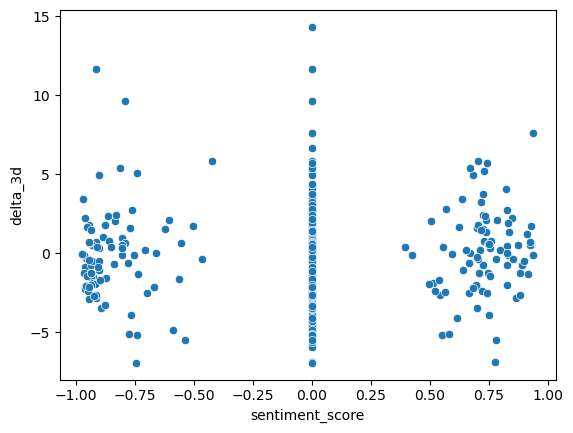

In [ ]:
#plot the scatter sentiment_score against delta_3d
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=merged_df, x="sentiment_score", y="delta_3d")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame 'standardized'
standardized = pd.DataFrame()

# Copy necessary columns from merged_df
standardized['date'] = merged_df['Date_merge']
standardized['day_of_week'] = merged_df['day_of_week']
standardized['month'] = merged_df['month']

# Standardize the 'delta_daily' column
standardized['delta_daily'] = StandardScaler().fit_transform(merged_df['delta_daily'].values.reshape(-1, 1))

# Calculate 'sentiment_negative' column based on 'sentiment_score'
standardized['sentiment_negative'] = merged_df['sentiment_negative'] * merged_df['sentiment_score']
standardized['sentiment_positive'] = merged_df['sentiment_positive'] * merged_df['sentiment_score']
standardized['sentiment_neutral'] = merged_df['sentiment_neutral'] * merged_df['sentiment_score']

# Standardize the 'sentiment_negative' column
standardized['sentiment_negative'] = StandardScaler().fit_transform(standardized['sentiment_negative'].values.reshape(-1, 1))
standardized['sentiment_positive'] = StandardScaler().fit_transform(standardized['sentiment_positive'].values.reshape(-1, 1))
standardized['sentiment_neutral'] = StandardScaler().fit_transform(standardized['sentiment_neutral'].values.reshape(-1, 1))


# Filter out rows with NaN values in the 'sentiment_negative' column
standardized = standardized.dropna(subset=['sentiment_negative' , "delta_daily"])

# reset index
standardized = standardized.reset_index(drop=True)

# Display the modified DataFrame
standardized


,date,day_of_week,month,delta_daily,sentiment_negative,sentiment_positive,sentiment_neutral
0,01-02-2022,Tuesday,February,-1.523805,1.598837,-0.536026,-1.076656
1,01-02-2022,Tuesday,February,-1.523805,-0.537542,-0.536026,0.951817
2,01-02-2022,Tuesday,February,-1.523805,-0.537542,1.852348,-1.076656
3,01-06-2021,Tuesday,June,-0.138697,1.709234,-0.536026,-1.076656
4,01-06-2021,Tuesday,June,-0.138697,-0.537542,-0.536026,1.021499
...,...,...,...,...,...,...,...
373,31-05-2023,Wednesday,May,1.116054,-0.537542,-0.536026,0.787079
374,31-05-2023,Wednesday,May,1.116054,1.778259,-0.536026,-1.076656
375,31-08-1999,Tuesday,August,0.954244,-0.537542,-0.536026,0.931206
376,31-10-2022,Monday,October,0.003141,-0.537542,-0.536026,0.621333


In [ ]:
# ols regression model 

# delta_daily against sentiment_negative, sentiment_positive, sentiment_neutral and day_of_week

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the regression formula

# formula = "delta_daily ~ sentiment_negative + sentiment_positive + sentiment_neutral + day_of_week + month"

formula = "delta_daily ~ sentiment_negative + day_of_week"

# Define the model
model = smf.ols(formula=formula, data=standardized)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:            delta_daily   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.335
Date:                Sat, 02 Sep 2023   Prob (F-statistic):            0.00584
Time:                        12:11:56   Log-Likelihood:                -528.07
No. Observations:                 378   AIC:                             1068.
Df Residuals:                     372   BIC:                             1092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
# Bond prices

# Define the ticker symbol for the Eurozone bond you're interested in
bond_ticker = ["DAX"]

# Define the start and end dates for the data you want to fetch
start_date = "2000-01-01"
end_date = "2023-08-01"

# Fetch the bond price data using yfinance
bond_data = yf.download(bond_ticker, start=start_date, end=end_date)

# remove the 1st row for Date, and keep it in 0th row
bond_data.reset_index(inplace=True)

# keep only date and adjusted close columns
bond_data = bond_data[['Date','Adj Close']]
bond_data.columns = ['Date', 'bond_price']

# generate more variables
bond_data['b_delta_daily'] = bond_data['bond_price'].diff()
bond_data['b_delta_3d'] = bond_data['bond_price'].diff(3)
bond_data['b_delta_5d'] = bond_data['bond_price'].diff(5)
bond_data['b_delta_30d'] = bond_data['bond_price'].diff(30)
bond_data['b_3d_pp_change'] = bond_data['bond_price'].pct_change(3)

# Display the downloaded data
bond_data 

[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_9079/2661862225.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_data['b_delta_daily'] = bond_data['bond_price'].diff()
/tmp/ipykernel_9079/2661862225.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_data['b_delta_3d'] = bond_data['bond_price'].diff(3)
/tmp/ipykernel_9079/2661862225.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,Date,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d,b_3d_pp_change
0,2014-10-23,20.524279,NaN,NaN,NaN,NaN,NaN
1,2014-10-24,20.475510,-0.048769,NaN,NaN,NaN,NaN
2,2014-10-27,20.343826,-0.131683,NaN,NaN,NaN,NaN
3,2014-10-28,20.735619,0.391792,0.211340,NaN,NaN,0.010297
4,2014-10-29,20.865671,0.130053,0.390162,NaN,NaN,0.019055
...,...,...,...,...,...,...,...
2201,2023-07-25,30.100000,0.130001,-0.049999,-0.309999,1.268011,-0.001658
2202,2023-07-26,30.080000,-0.020000,-0.070000,-0.240000,0.866453,-0.002322
2203,2023-07-27,30.000000,-0.080000,0.030001,-0.150000,0.590784,0.001001
2204,2023-07-28,30.490000,0.490000,0.389999,0.340000,0.982948,0.012957


In [ ]:
# merge bond and merged_df
merged_df = pd.merge(merged_df, bond_data, left_on='Date', right_on='Date', how='outer')
# create 3 day lagged percentage change
merged_df['b_delta_3d_pct_lag'] = merged_df['b_3d_pp_change'].shift(3)
merged_df['delta_3d_pct_lag'] = merged_df['3d_pp_change'].shift(3)
merged_df

,Date,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,delta_3d,delta_5d,delta_30d,...,sentiment_neutral,sentiment_positive,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d,b_3d_pp_change,b_delta_3d_pct_lag,delta_3d_pct_lag
0,1999-01-04,V2TX,18.2033,04-01-1999,Monday,January,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-01-06,V2TX,25.1670,06-01-1999,Wednesday,January,-4.5242,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-01-07,V2TX,32.5205,07-01-1999,Thursday,January,7.3535,14.3172,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,2021-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31.150692,0.658386,1.090830,1.319551,2.166845,0.036289,-0.003697,NaN
6509,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.720982,0.192863,0.041094,0.326971,-0.574852,0.001339,0.007830,NaN
6510,2022-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25.842300,-0.114010,0.057957,-0.437037,1.339621,0.002248,-0.016633,NaN
6511,2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.802639,-0.097836,-0.088053,0.088051,1.653412,-0.003048,0.036289,NaN


In [ ]:
merged_df.describe()

,Date,Indexvalue,delta_daily,delta_3d,delta_5d,delta_30d,3d_pp_change,sentiment_score,sentiment_negative,sentiment_neutral,sentiment_positive,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d,b_3d_pp_change,b_delta_3d_pct_lag,delta_3d_pct_lag
count,6472,6442.000000,6441.000000,6438.000000,6436.000000,6407.000000,6438.000000,420.000000,420.000000,420.000000,420.000000,2363.000000,2362.000000,2360.000000,2358.000000,2333.000000,2360.000000,2357.000000,6438.000000
mean,2011-08-15 05:05:42.645240832,23.745494,-0.000812,-0.002198,-0.001188,-0.117159,0.005630,0.834390,0.211905,0.573810,0.214286,24.707562,0.003771,0.015055,0.025226,0.137136,0.000881,0.000876,0.005630
min,1999-01-04 00:00:00,10.678300,-13.987300,-31.328600,-27.666400,-54.900100,-0.403941,0.394449,0.000000,0.000000,0.000000,15.713292,-2.268639,-3.506903,-4.961187,-9.587053,-0.175011,-0.175011,-0.403941
25%,2005-05-02 18:00:00,17.352175,-0.796700,-1.357775,-1.724875,-3.564600,-0.061544,0.767635,0.000000,0.000000,0.000000,21.853713,-0.154525,-0.254741,-0.298640,-0.699909,-0.010454,-0.010565,-0.061544
50%,2011-09-05 12:00:00,21.840200,-0.100400,-0.137300,-0.178650,-0.639700,-0.006937,0.866406,0.000000,1.000000,0.000000,24.553036,0.008644,0.029675,0.068186,0.235357,0.001183,0.001176,-0.006937
75%,2017-12-28 06:00:00,27.316325,0.663400,1.188250,1.443900,2.523200,0.057071,0.926595,0.000000,1.000000,0.000000,27.141617,0.184257,0.329349,0.400460,1.089788,0.013057,0.013048,0.057071
max,2023-08-21 00:00:00,87.512700,22.641500,31.859100,39.871200,71.191700,0.947828,0.972653,1.000000,1.000000,1.000000,32.657291,1.835562,2.723280,3.080296,5.618279,0.167343,0.167343,0.947828
std,NaN,9.302241,1.814967,2.984199,3.684632,7.285938,0.110118,0.115070,0.409145,0.495112,0.410815,3.636605,0.325765,0.550841,0.710288,1.672240,0.023749,0.023762,0.110118


In [ ]:
# data with no nans if column is null
restricted_sample = merged_df[merged_df['sentiment'].notnull()]
restricted_sample.reset_index(inplace=True)
restricted_sample

,index,Date,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,delta_3d,delta_5d,...,sentiment_neutral,sentiment_positive,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d,b_3d_pp_change,b_delta_3d_pct_lag,delta_3d_pct_lag
0,0,1999-01-04,V2TX,18.2033,04-01-1999,Monday,January,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1999-01-07,V2TX,32.5205,07-01-1999,Thursday,January,7.3535,14.3172,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1999-01-11,V2TX,36.8411,11-01-1999,Monday,January,3.6115,11.6741,18.6378,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,6478,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,6479,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,6480,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,6481,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
restricted_sample.tail(20)

,index,Date,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,delta_3d,delta_5d,...,sentiment_neutral,sentiment_positive,bond_price,b_delta_daily,b_delta_3d,b_delta_5d,b_delta_30d,b_3d_pp_change,b_delta_3d_pct_lag,delta_3d_pct_lag
400,6463,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,6464,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,6465,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,6466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,6467,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,6468,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,6469,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,6470,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,6471,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,6472,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# run olx regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the regression formula
formula = "delta_3d_pct_lag ~ sentiment_score * sentiment_negative "

# Fit the regression
model = smf.ols(formula=formula, data=restricted_sample).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       delta_3d_pct_lag   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4566
Date:                Wed, 23 Aug 2023   Prob (F-statistic):              0.713
Time:                        12:25:40   Log-Likelihood:                 256.86
No. Observations:                 377   AIC:                            -505.7
Df Residuals:                     373   BIC:                            -490.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
# Testing FinBERT again 

In [ ]:
text = "Lehman's bankruptcy reverberated through global markets as its complex positions were unwound and investors worried which financial institutions could be next to fall. Within days, the insurer AIG and savings bank Washington Mutual were in trouble and the US government scrambled to put together a $700bn banking bailout package"

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

sentiment = pipe(text)
sentiment

[{'label': 'negative', 'score': 0.9238168597221375}]

In [ ]:
# plot daily change in index over time
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the daily change in the index and sentiment score
sns.lineplot(data=standardized, x="date", y="delta_daily", label="Delta Daily")
#sns.lineplot(data=standardized, x="date", y="sentiment_negative", label="Sentiment Negative")
#sns.lineplot(data=standardized, x="date", y="sentiment_positive", label="Sentiment Positive")
#sns.lineplot(data=standardized, x="date", y="sentiment_neutral", label="Sentiment Neutral")

# Set the title and axis labels
plt.title("Daily change in the VSTOXX index")
plt.xlabel("Date")

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Importing speech sentiments from Colab notebook

In [62]:
import pandas as pd
sentiments = pd.read_csv("src/Data/speech_all_finbert.csv")
sentiments

,Unnamed: 0,date,content,sentiment,probability
0,0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...,positive,0.854208
1,1,1998-07-17,Economic growth has been driven increasingly b...,positive,0.947828
2,2,1998-07-17,"In principle, the economic performance I have ...",neutral,0.600082
3,3,1998-07-17,"Third, further structural adjustments in fisca...",neutral,0.824068
4,4,1998-07-17,There is currently no sign of exchange rate te...,neutral,0.756298
...,...,...,...,...,...
46014,46077,2022-02-25,Since the exchange of confidential information...,positive,0.664321
46015,46078,2022-02-25,"Last year, following discussions in the Counci...",neutral,0.762738
46016,46079,2022-02-25,This type of measure has so far only been impl...,neutral,0.897179
46017,46080,2022-02-25,The ECB incorporated in its opinions its exper...,neutral,0.868921


In [63]:
import pandas as pd

def generalize_sentiments(df):
    """
    Generalizes the sentiments of a dataframe by consolidating rows with the same date.
    It aggregates content by date, computes sentiment counts, and calculates max, min, and average 
    probabilities for each sentiment type (positive, negative, neutral).

    Parameters:
    - df (pandas.DataFrame): DataFrame containing 'date', 'content', 'sentiment', 
                             and respective sentiment probabilities columns.

    Returns:
    - pandas.DataFrame: DataFrame with consolidated content and aggregated sentiment metrics.
    """
    
    # Convert content to string to avoid TypeError and concatenate for rows with the same date
    consolidated_content = df.groupby('date')['content'].apply(lambda x: ' '.join(map(str, x))).reset_index()

    # Compute sentiment counts for each date
    sentiment_counts = df.groupby(['date', 'sentiment']).size().unstack().reset_index().fillna(0)
    sentiment_counts.columns = ['date'] + [f"{col.lower()}_counts" for col in sentiment_counts.columns if col != 'date']

    # Compute max, min, and average probabilities for each sentiment by date
    aggregations = {}
    for sentiment in ['positive', 'negative', 'neutral']:
        mask = df['sentiment'] == sentiment
        aggregated = df[mask].groupby('date').agg({
            'probability': ['max', 'min', 'mean']
        }).reset_index()
        
        # Flatten the multi-index column names
        aggregated.columns = ['date'] + [f"{sentiment}_{metric}" for metric in ['max', 'min', 'mean']]
        aggregations[sentiment] = aggregated

    # Merge the created dataframes to generate the final output
    result = consolidated_content
    result = pd.merge(result, sentiment_counts, on='date', how='inner')
    for sentiment in ['positive', 'negative', 'neutral']:
        result = pd.merge(result, aggregations[sentiment], on='date', how='inner')

    return result


In [64]:
gen_data = generalize_sentiments(sentiments)
gen_data['weighted_prob'] = (gen_data['negative_counts'] * gen_data['negative_mean'] * (-1) + gen_data['positive_counts'] * gen_data['positive_mean'] ) / (gen_data['negative_counts']+gen_data['positive_counts'])

In [65]:
gen_data

,date,content,negative_counts,neutral_counts,positive_counts,positive_max,positive_min,positive_mean,negative_max,negative_min,negative_mean,neutral_max,neutral_min,neutral_mean,weighted_prob
0,1998-11-09,Mr. Duisenberg’s opening statement at the pres...,6.0,13.0,2.0,0.899266,0.765561,0.832413,0.962060,0.523458,0.785708,0.948906,0.531514,0.870117,-0.381178
1,1998-12-03,Mr Duisenberg reports on the current position ...,2.0,14.0,3.0,0.808924,0.565346,0.677796,0.847879,0.645703,0.746791,0.952718,0.680924,0.828251,0.107961
2,1999-01-08,Mr Duisenberg’s opening statement at the press...,2.0,18.0,2.0,0.923603,0.554621,0.739112,0.947072,0.880715,0.913893,0.949159,0.535464,0.845749,-0.087391
3,1999-01-11,Mr Duisenberg’s opening statement at the press...,10.0,23.0,2.0,0.817296,0.668759,0.743027,0.954375,0.496729,0.723577,0.950720,0.375282,0.818889,-0.479143
4,1999-01-19,Mr Duisenberg’s opening statement at the Europ...,6.0,16.0,2.0,0.870406,0.866672,0.868539,0.968294,0.739333,0.871450,0.946656,0.559591,0.827322,-0.436452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2022-01-21,Christine Lagarde: Introductory statement at t...,1.0,7.0,10.0,0.953582,0.613189,0.747925,0.466378,0.466378,0.466378,0.839482,0.542453,0.744504,0.637534
1248,2022-02-04,Christine Lagarde: Introductory statement at E...,4.0,1.0,4.0,0.954398,0.446699,0.824757,0.943139,0.491753,0.756767,0.539072,0.539072,0.539072,0.033995
1249,2022-02-10,Christine Lagarde: Hearing of the Committee on...,4.0,5.0,3.0,0.953364,0.543439,0.779126,0.943748,0.461614,0.703850,0.872223,0.506347,0.692795,-0.068289
1250,2022-02-17,Christine Lagarde: Introductory statement - Eu...,3.0,8.0,5.0,0.946285,0.534803,0.763456,0.928384,0.727196,0.845817,0.895302,0.626179,0.816141,0.159978


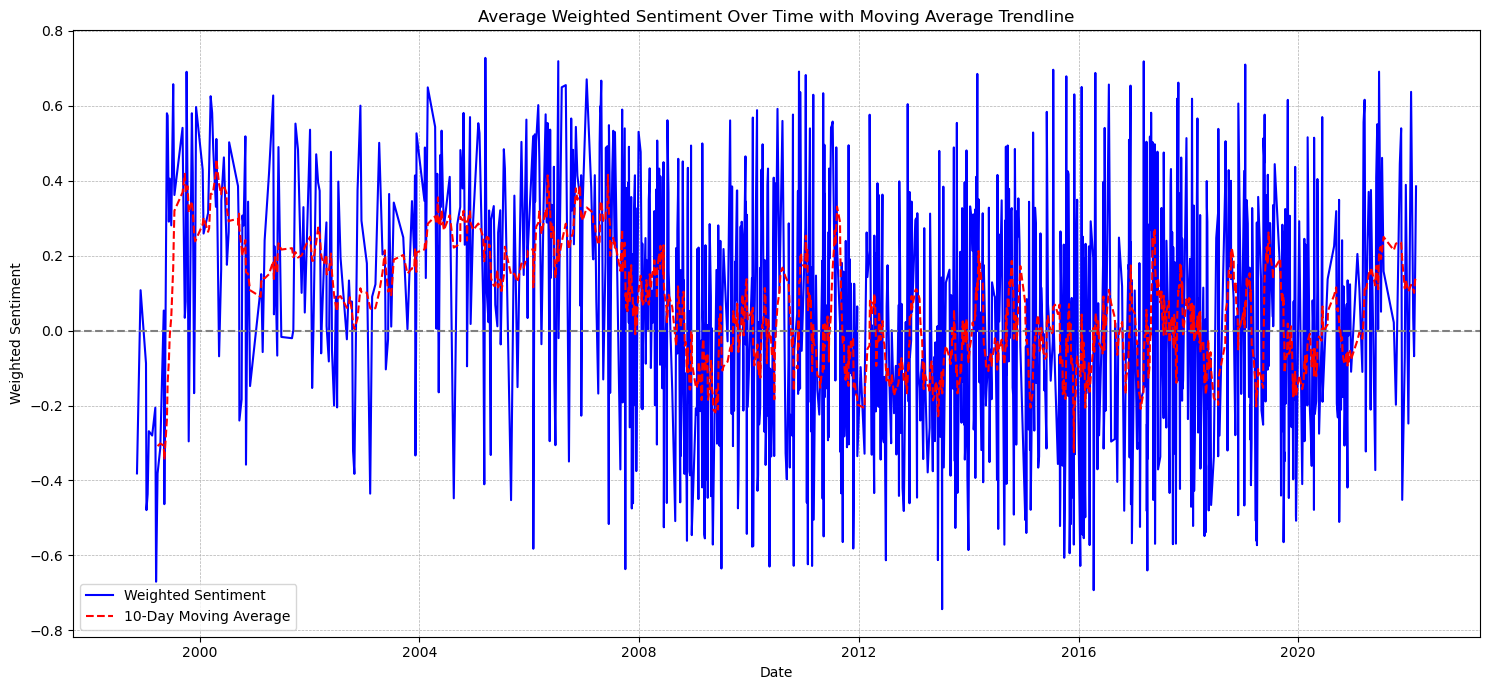

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming gen_data is your dataframe
# Convert the date column to datetime type for better plotting
gen_data['date'] = pd.to_datetime(gen_data['date'])

# Calculate the moving average. Adjust the window size as needed.
window_size = 10  # Adjust this as per your preference
gen_data['moving_avg'] = gen_data['weighted_prob'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(15,7))
plt.plot(gen_data['date'], gen_data['weighted_prob'], label='Weighted Sentiment', color='blue')
plt.plot(gen_data['date'], gen_data['moving_avg'], "r--", label=f'{window_size}-Day Moving Average')
plt.axhline(y=0, color='grey', linestyle='--')  # A line at y=0 for reference

plt.title('Average Weighted Sentiment Over Time with Moving Average Trendline')
plt.xlabel('Date')
plt.ylabel('Weighted Sentiment')
plt.legend()
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [67]:
vstoxx_df

,Date,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,shifted_1_day,delta_shifted,delta_shifted_2
0,1999-01-04,V2TX,18.2033,04-01-1999,Monday,January,NaN,25.1670,-6.9637,NaN
1,1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,32.5205,-2.8293,-6.9637
2,1999-01-06,V2TX,25.1670,06-01-1999,Wednesday,January,-4.5242,33.2296,-8.0626,-2.8293
3,1999-01-07,V2TX,32.5205,07-01-1999,Thursday,January,7.3535,36.8411,-4.3206,-8.0626
4,1999-01-08,V2TX,33.2296,08-01-1999,Friday,January,0.7091,37.5664,-4.3368,-4.3206
...,...,...,...,...,...,...,...,...,...,...
6268,2023-08-15,V2TX,18.8579,15-08-2023,Tuesday,August,0.8050,20.3539,-1.4960,-0.4981
6269,2023-08-16,V2TX,18.5510,16-08-2023,Wednesday,August,-0.3069,20.2456,-1.6946,-1.4960
6270,2023-08-17,V2TX,20.3539,17-08-2023,Thursday,August,1.8029,19.8367,0.5172,-1.6946
6271,2023-08-18,V2TX,20.2456,18-08-2023,Friday,August,-0.1083,NaN,NaN,0.5172


In [68]:
# Set the date columns as index for both dataframes for easier merging
vstoxx_df.set_index('Date', inplace=True)
gen_data.set_index('date', inplace=True)

# Merge the dataframes using an outer join
merged_df = pd.merge(vstoxx_df, gen_data, left_index=True, right_index=True, how='outer')

# Forward fill the sentiment values, in this case, the weighted_prob column
merged_df['weighted_prob'] = merged_df['weighted_prob'].fillna(method='ffill')

In [70]:
merged_df

,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,shifted_1_day,delta_shifted,delta_shifted_2,content,negative_counts,neutral_counts,positive_counts,positive_max,positive_min,positive_mean,negative_max,negative_min,negative_mean,neutral_max,neutral_min,neutral_mean,weighted_prob,moving_avg
1998-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mr. Duisenberg’s opening statement at the pres...,6.0,13.0,2.0,0.899266,0.765561,0.832413,0.962060,0.523458,0.785708,0.948906,0.531514,0.870117,-0.381178,NaN
1998-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mr Duisenberg reports on the current position ...,2.0,14.0,3.0,0.808924,0.565346,0.677796,0.847879,0.645703,0.746791,0.952718,0.680924,0.828251,0.107961,NaN
1999-01-04,V2TX,18.2033,04-01-1999,Monday,January,NaN,25.1670,-6.9637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107961,NaN
1999-01-05,V2TX,29.6912,05-01-1999,Tuesday,January,11.4879,32.5205,-2.8293,-6.9637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107961,NaN
1999-01-06,V2TX,25.1670,06-01-1999,Wednesday,January,-4.5242,33.2296,-8.0626,-2.8293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107961,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-15,V2TX,18.8579,15-08-2023,Tuesday,August,0.8050,20.3539,-1.4960,-0.4981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385197,NaN
2023-08-16,V2TX,18.5510,16-08-2023,Wednesday,August,-0.3069,20.2456,-1.6946,-1.4960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385197,NaN
2023-08-17,V2TX,20.3539,17-08-2023,Thursday,August,1.8029,19.8367,0.5172,-1.6946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385197,NaN
2023-08-18,V2TX,20.2456,18-08-2023,Friday,August,-0.1083,NaN,NaN,0.5172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385197,NaN


Index(['Symbol', 'Indexvalue', 'Date_merge', 'day_of_week', 'month',
       'delta_daily', 'shifted_1_day', 'delta_shifted', 'delta_shifted_2',
       'vstoxx_direction'],
      dtype='object')


,content,negative_counts,neutral_counts,positive_counts,positive_max,positive_min,positive_mean,negative_max,negative_min,negative_mean,neutral_max,neutral_min,neutral_mean,weighted_prob,moving_avg,sentiment_direction,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,shifted_1_day,delta_shifted,delta_shifted_2,vstoxx_direction,direction_match
0,Mr Duisenberg’s opening statement at the press...,2.0,18.0,2.0,0.923603,0.554621,0.739112,0.947072,0.880715,0.913893,0.949159,0.535464,0.845749,-0.087391,NaN,-1,V2TX,33.2296,08-01-1999,Friday,January,0.7091,37.5664,-4.3368,-4.3206,1,0
1,Mr Duisenberg’s opening statement at the press...,10.0,23.0,2.0,0.817296,0.668759,0.743027,0.954375,0.496729,0.723577,0.950720,0.375282,0.818889,-0.479143,NaN,-1,V2TX,36.8411,11-01-1999,Monday,January,3.6115,39.7373,-2.8962,-4.3368,1,0
2,Mr Duisenberg’s opening statement at the Europ...,6.0,16.0,2.0,0.870406,0.866672,0.868539,0.968294,0.739333,0.871450,0.946656,0.559591,0.827322,-0.436452,NaN,1,V2TX,38.7869,19-01-1999,Tuesday,January,0.2430,36.9171,1.8698,2.9904,1,1
3,Mr Duisenberg reports on monetary policy in th...,5.0,23.0,3.0,0.750222,0.492097,0.594387,0.960274,0.520140,0.786164,0.932929,0.500153,0.822684,-0.268458,NaN,1,V2TX,41.7569,27-01-1999,Wednesday,January,-0.9975,37.6140,4.1429,3.6065,-1,0
4,Mr Duisenberg evaluates the single European mo...,6.0,19.0,3.0,0.753922,0.561741,0.632044,0.900991,0.523131,0.736135,0.932448,0.601930,0.861746,-0.280075,NaN,-1,V2TX,35.5630,18-02-1999,Thursday,February,-1.1228,32.0859,3.4771,2.7715,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,Christine Lagarde: Introductory statement at t...,1.0,7.0,10.0,0.953582,0.613189,0.747925,0.466378,0.466378,0.466378,0.839482,0.542453,0.744504,0.637534,0.122252,1,V2TX,24.2217,21-01-2022,Friday,January,3.8184,31.4530,-7.2313,-12.2778,1,1
1243,Christine Lagarde: Introductory statement at E...,4.0,1.0,4.0,0.954398,0.446699,0.824757,0.943139,0.491753,0.756767,0.539072,0.539072,0.539072,0.033995,0.109810,-1,V2TX,26.3008,04-02-2022,Friday,February,1.9721,23.1564,3.1444,0.0854,1,0
1244,Christine Lagarde: Hearing of the Committee on...,4.0,5.0,3.0,0.953364,0.543439,0.779126,0.943748,0.461614,0.703850,0.872223,0.506347,0.692795,-0.068289,0.100805,-1,V2TX,21.8414,10-02-2022,Thursday,February,0.4297,30.0547,-8.2133,-3.2520,1,0
1245,Christine Lagarde: Introductory statement - Eu...,3.0,8.0,5.0,0.946285,0.534803,0.763456,0.928384,0.727196,0.845817,0.895302,0.626179,0.816141,0.159978,0.136591,1,V2TX,28.7931,17-02-2022,Thursday,February,2.1793,36.2245,-7.4314,-4.6531,1,1


In [30]:
# keep only the columns where content, delta_daily and positive_min are not null
filtered_df = merged_df[merged_df['content'].notna() & merged_df['delta_daily'].notna() & merged_df['positive_min'].notna()]
# do not limit the number of columns displayed
pd.set_option('display.max_columns', None)
filtered_df

,content,negative_counts,neutral_counts,positive_counts,positive_max,positive_min,positive_mean,negative_max,negative_min,negative_mean,neutral_max,neutral_min,neutral_mean,weighted_prob,moving_avg,sentiment_direction,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,shifted_1_day,delta_shifted,delta_shifted_2,vstoxx_direction,direction_match
0,Mr Duisenberg’s opening statement at the press...,2.0,18.0,2.0,0.923603,0.554621,0.739112,0.947072,0.880715,0.913893,0.949159,0.535464,0.845749,-0.087391,NaN,-1,V2TX,33.2296,08-01-1999,Friday,January,0.7091,37.5664,-4.3368,-4.3206,1,0
1,Mr Duisenberg’s opening statement at the press...,10.0,23.0,2.0,0.817296,0.668759,0.743027,0.954375,0.496729,0.723577,0.950720,0.375282,0.818889,-0.479143,NaN,-1,V2TX,36.8411,11-01-1999,Monday,January,3.6115,39.7373,-2.8962,-4.3368,1,0
2,Mr Duisenberg’s opening statement at the Europ...,6.0,16.0,2.0,0.870406,0.866672,0.868539,0.968294,0.739333,0.871450,0.946656,0.559591,0.827322,-0.436452,NaN,1,V2TX,38.7869,19-01-1999,Tuesday,January,0.2430,36.9171,1.8698,2.9904,1,1
3,Mr Duisenberg reports on monetary policy in th...,5.0,23.0,3.0,0.750222,0.492097,0.594387,0.960274,0.520140,0.786164,0.932929,0.500153,0.822684,-0.268458,NaN,1,V2TX,41.7569,27-01-1999,Wednesday,January,-0.9975,37.6140,4.1429,3.6065,-1,0
4,Mr Duisenberg evaluates the single European mo...,6.0,19.0,3.0,0.753922,0.561741,0.632044,0.900991,0.523131,0.736135,0.932448,0.601930,0.861746,-0.280075,NaN,-1,V2TX,35.5630,18-02-1999,Thursday,February,-1.1228,32.0859,3.4771,2.7715,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,Christine Lagarde: Introductory statement at t...,1.0,7.0,10.0,0.953582,0.613189,0.747925,0.466378,0.466378,0.466378,0.839482,0.542453,0.744504,0.637534,0.122252,1,V2TX,24.2217,21-01-2022,Friday,January,3.8184,31.4530,-7.2313,-12.2778,1,1
1243,Christine Lagarde: Introductory statement at E...,4.0,1.0,4.0,0.954398,0.446699,0.824757,0.943139,0.491753,0.756767,0.539072,0.539072,0.539072,0.033995,0.109810,-1,V2TX,26.3008,04-02-2022,Friday,February,1.9721,23.1564,3.1444,0.0854,1,0
1244,Christine Lagarde: Hearing of the Committee on...,4.0,5.0,3.0,0.953364,0.543439,0.779126,0.943748,0.461614,0.703850,0.872223,0.506347,0.692795,-0.068289,0.100805,-1,V2TX,21.8414,10-02-2022,Thursday,February,0.4297,30.0547,-8.2133,-3.2520,1,0
1245,Christine Lagarde: Introductory statement - Eu...,3.0,8.0,5.0,0.946285,0.534803,0.763456,0.928384,0.727196,0.845817,0.895302,0.626179,0.816141,0.159978,0.136591,1,V2TX,28.7931,17-02-2022,Thursday,February,2.1793,36.2245,-7.4314,-4.6531,1,1


In [12]:
import statsmodels.api as sm

# Drop any NA values after merging and forward filling
merged_df.dropna(inplace=True)

X = merged_df['delta_daily']
y = merged_df['weighted_prob']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          weighted_prob   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 0.0005645
Date:                Sun, 24 Sep 2023   Prob (F-statistic):              0.981
Time:                        09:09:37   Log-Likelihood:                -356.60
No. Observations:                1240   AIC:                             717.2
Df Residuals:                    1238   BIC:                             727.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0426      0.009      4.646      

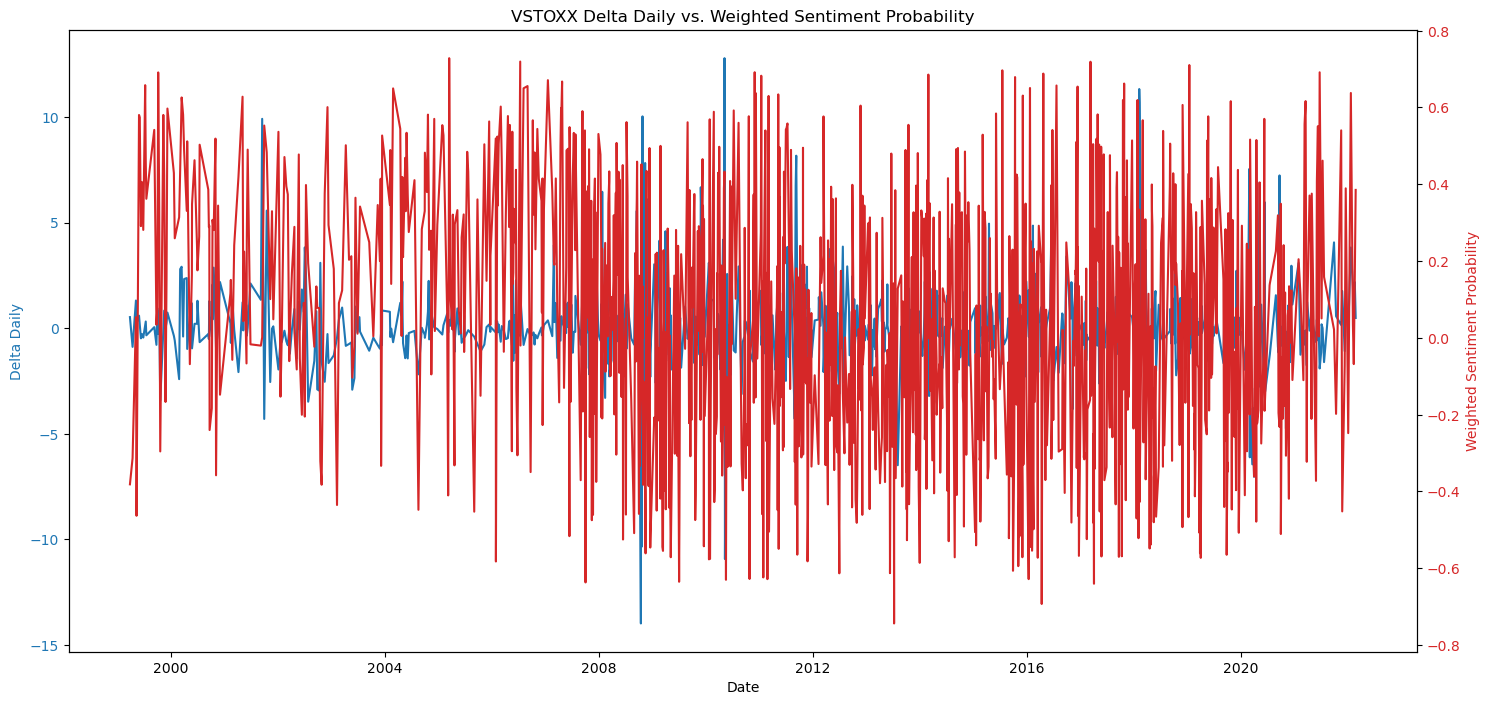

In [13]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,7))

# Plotting the delta_daily on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Delta Daily', color='tab:blue')
ax1.plot(merged_df.index, merged_df['delta_daily'], color='tab:blue', label='Delta Daily')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for the weighted_prob
ax2 = ax1.twinx()
ax2.set_ylabel('Weighted Sentiment Probability', color='tab:red')
ax2.plot(merged_df.index, merged_df['weighted_prob'], color='tab:red', label='Weighted Sentiment Probability')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # To ensure that the right y-label is not slightly clipped
plt.title('VSTOXX Delta Daily vs. Weighted Sentiment Probability')
plt.show()


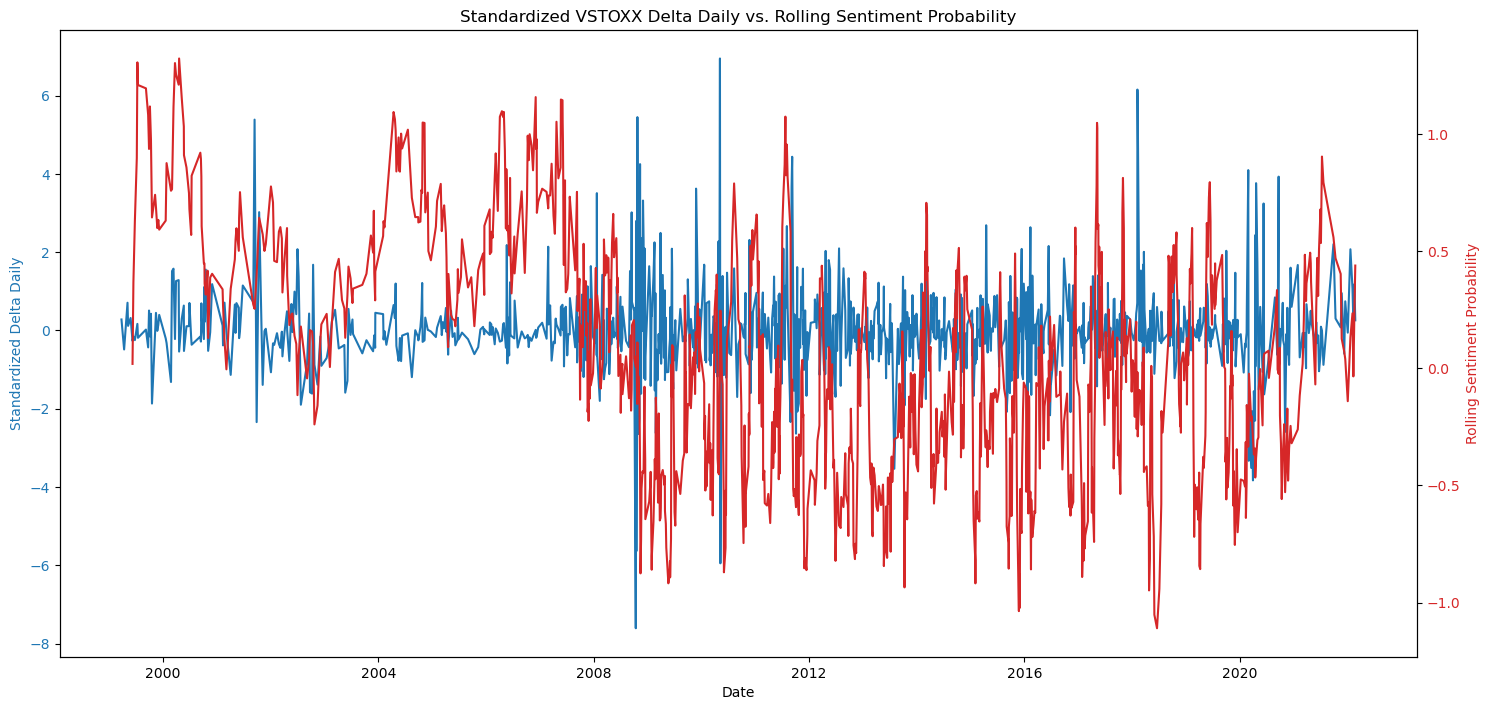

In [14]:
import matplotlib.pyplot as plt

# Standardize the data
merged_df['std_delta_daily'] = (merged_df['delta_daily'] - merged_df['delta_daily'].mean()) / merged_df['delta_daily'].std()
merged_df['std_weighted_prob'] = (merged_df['weighted_prob'] - merged_df['weighted_prob'].mean()) / merged_df['weighted_prob'].std()

# Smooth the sentiment data using a rolling average (let's say 7 days for a week)
merged_df['rolling_weighted_prob'] = merged_df['std_weighted_prob'].rolling(window=7).mean()

fig, ax1 = plt.subplots(figsize=(15,7))

# Plotting the standardized delta_daily
ax1.set_xlabel('Date')
ax1.set_ylabel('Standardized Delta Daily', color='tab:blue')
ax1.plot(merged_df.index, merged_df['std_delta_daily'], color='tab:blue', label='Standardized Delta Daily')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plotting the smoothed and standardized sentiment
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Sentiment Probability', color='tab:red')
ax2.plot(merged_df.index, merged_df['rolling_weighted_prob'], color='tab:red', label='Rolling Sentiment Probability')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Standardized VSTOXX Delta Daily vs. Rolling Sentiment Probability')
plt.show()


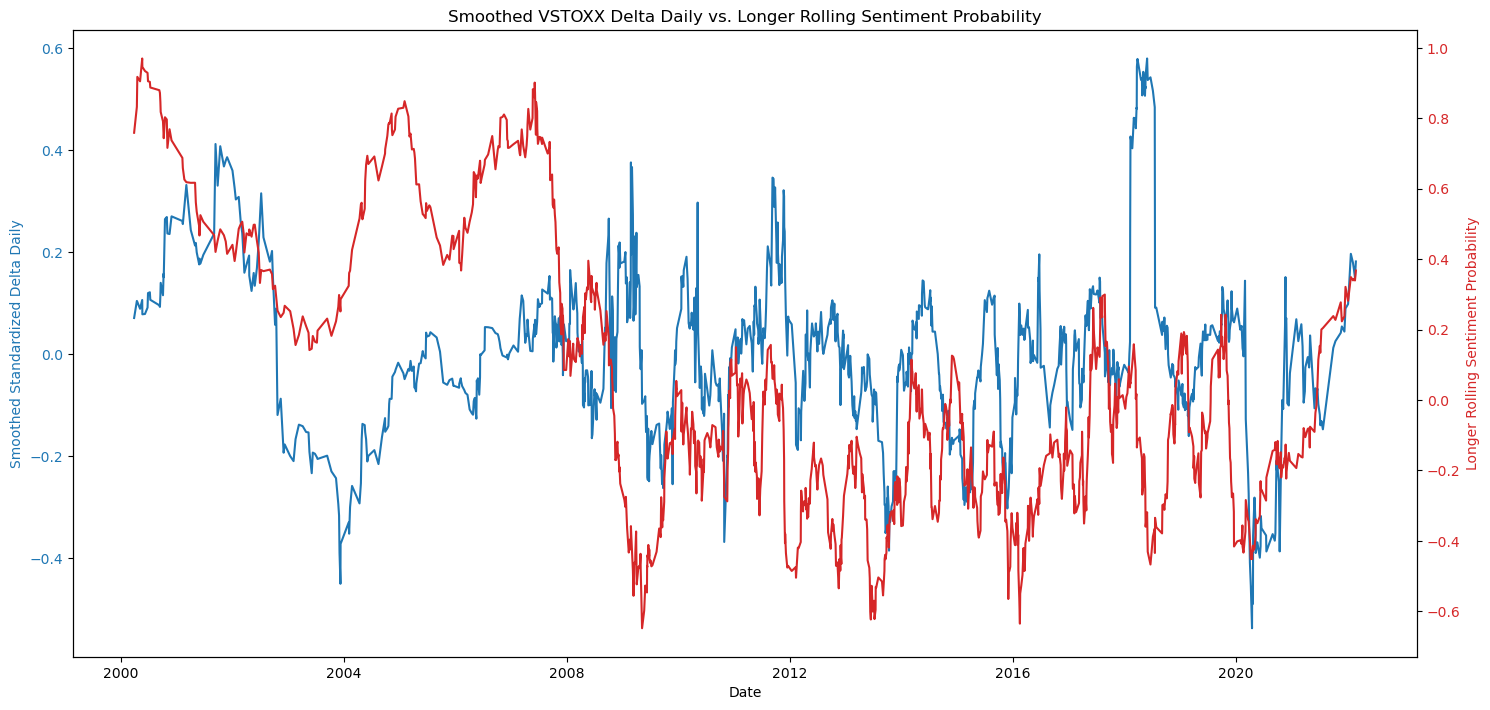

In [15]:
# Using a longer rolling window for smoothing (e.g., 30 days for a month)
window_length = 30

merged_df['std_delta_daily'] = (merged_df['delta_daily'] - merged_df['delta_daily'].mean()) / merged_df['delta_daily'].std()
merged_df['std_weighted_prob'] = (merged_df['weighted_prob'] - merged_df['weighted_prob'].mean()) / merged_df['weighted_prob'].std()

# Smoothing both the standardized delta_daily and sentiment data
merged_df['rolling_std_delta_daily'] = merged_df['std_delta_daily'].rolling(window=window_length).mean()
merged_df['longer_rolling_weighted_prob'] = merged_df['std_weighted_prob'].rolling(window=window_length).mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(15,7))

# Plotting the smoothed standardized delta_daily
ax1.set_xlabel('Date')
ax1.set_ylabel('Smoothed Standardized Delta Daily', color='tab:blue')
ax1.plot(merged_df.index, merged_df['rolling_std_delta_daily'], color='tab:blue', label='Smoothed Standardized Delta Daily')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plotting the longer smoothed and standardized sentiment
ax2 = ax1.twinx()
ax2.set_ylabel('Longer Rolling Sentiment Probability', color='tab:red')
ax2.plot(merged_df.index, merged_df['longer_rolling_weighted_prob'], color='tab:red', label='Longer Rolling Sentiment Probability')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Smoothed VSTOXX Delta Daily vs. Longer Rolling Sentiment Probability')
plt.show()


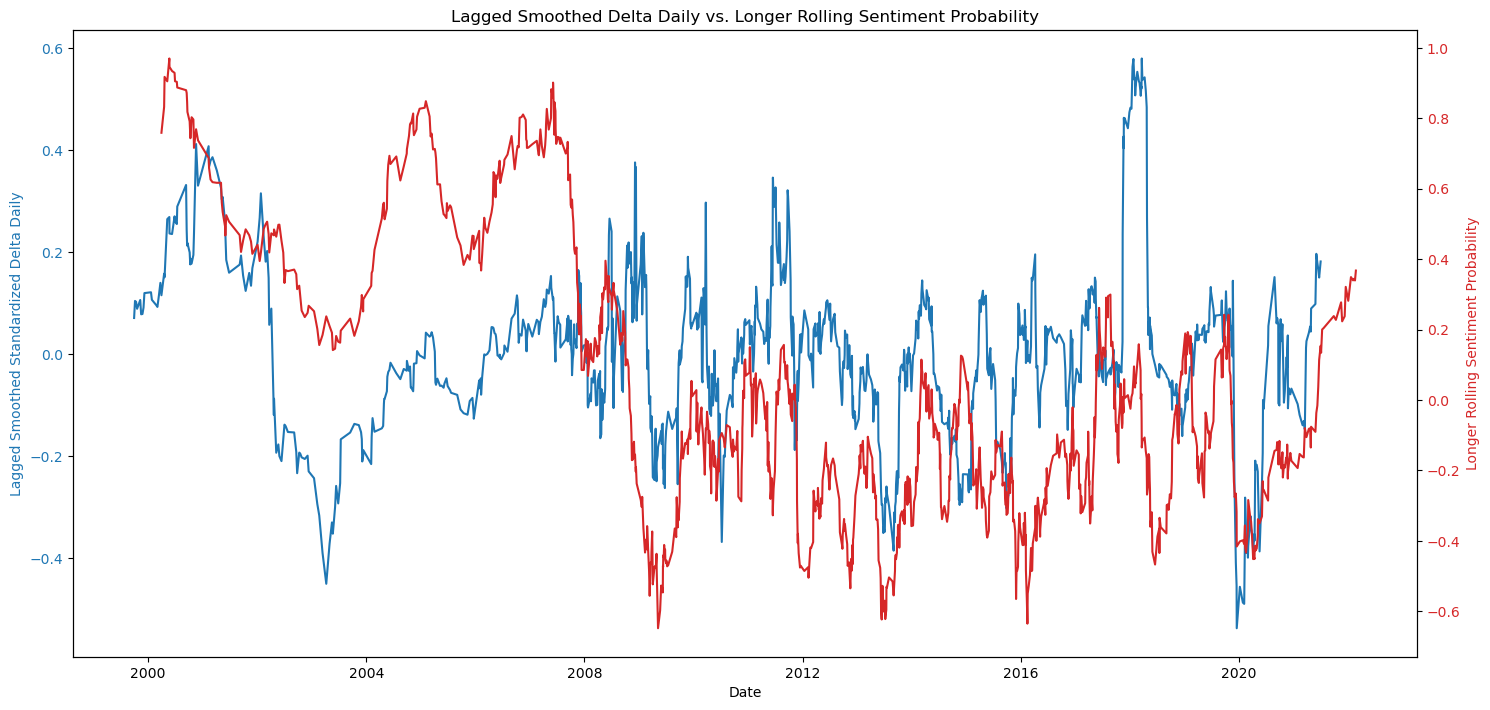

In [16]:
# Introduce a lag of N day
lag = 15
merged_df['lagged_rolling_std_delta_daily'] = merged_df['rolling_std_delta_daily'].shift(-lag)

# Now, let's plot the lagged_rolling_std_delta_daily and longer_rolling_weighted_prob
fig, ax1 = plt.subplots(figsize=(15,7))

# Plotting the lagged smoothed standardized delta_daily
ax1.set_xlabel('Date')
ax1.set_ylabel('Lagged Smoothed Standardized Delta Daily', color='tab:blue')
ax1.plot(merged_df.index, merged_df['lagged_rolling_std_delta_daily'], color='tab:blue', label='Lagged Smoothed Standardized Delta Daily')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plotting the longer smoothed and standardized sentiment
ax2 = ax1.twinx()
ax2.set_ylabel('Longer Rolling Sentiment Probability', color='tab:red')
ax2.plot(merged_df.index, merged_df['longer_rolling_weighted_prob'], color='tab:red', label='Longer Rolling Sentiment Probability')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Lagged Smoothed Delta Daily vs. Longer Rolling Sentiment Probability')
plt.show()


In [18]:
import statsmodels.api as sm

# Dropping any NaN values introduced due to rolling or shifting
cleaned_df = merged_df.dropna(subset=['lagged_rolling_std_delta_daily', 'longer_rolling_weighted_prob'])

X = cleaned_df['longer_rolling_weighted_prob']
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = cleaned_df['lagged_rolling_std_delta_daily']

model = sm.OLS(y, X).fit()

print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     lagged_rolling_std_delta_daily   R-squared:                       0.077
Model:                                        OLS   Adj. R-squared:                  0.076
Method:                             Least Squares   F-statistic:                     99.85
Date:                            Sun, 24 Sep 2023   Prob (F-statistic):           1.24e-22
Time:                                    09:10:00   Log-Likelihood:                 535.19
No. Observations:                            1196   AIC:                            -1066.
Df Residuals:                                1194   BIC:                            -1056.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      

In [19]:
merged_df

,Symbol,Indexvalue,Date_merge,day_of_week,month,delta_daily,shifted_1_day,delta_shifted,delta_shifted_2,content,...,neutral_min,neutral_mean,weighted_prob,moving_avg,std_delta_daily,std_weighted_prob,rolling_weighted_prob,rolling_std_delta_daily,longer_rolling_weighted_prob,lagged_rolling_std_delta_daily
1999-03-26,V2TX,28.5730,26-03-1999,Friday,March,0.5204,27.2308,1.3422,0.7336,"Mr Duisenberg considers the euro, the dollar a...",...,0.538869,0.786880,-0.381400,-0.308213,0.278965,-1.313802,NaN,NaN,NaN,NaN
1999-04-13,V2TX,24.4003,13-04-1999,Tuesday,April,-0.8890,26.5825,-2.1822,-0.1851,Mr. Duisenberg reports at a press conference o...,...,0.499169,0.780051,-0.313016,-0.301396,-0.487417,-1.101908,NaN,NaN,NaN,NaN
1999-05-06,V2TX,26.9529,06-05-1999,Thursday,May,1.3065,27.3060,-0.3531,-1.4384,Mr Duisenberg offers his view on the role of t...,...,0.577621,0.855183,0.053613,-0.306831,0.706419,0.034137,NaN,NaN,NaN,NaN
1999-05-10,V2TX,27.3060,10-05-1999,Monday,May,0.2212,27.5905,-0.2845,0.5297,Mr Duisenberg reports on the outcome of the la...,...,0.650394,0.837481,-0.463266,-0.344419,0.116271,-1.567473,NaN,NaN,NaN,NaN
1999-05-27,V2TX,27.2467,27-05-1999,Thursday,May,0.5899,24.9911,2.2556,1.0892,Mr Noyer reviews first experiences with the eu...,...,0.594592,0.788931,0.580243,-0.238480,0.316757,1.665961,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21,V2TX,24.2217,21-01-2022,Friday,January,3.8184,31.4530,-7.2313,-12.2778,Christine Lagarde: Introductory statement at t...,...,0.542453,0.744504,0.637534,0.122252,2.072303,1.843485,0.132304,0.196478,0.348814,NaN
2022-02-04,V2TX,26.3008,04-02-2022,Friday,February,1.9721,23.1564,3.1444,0.0854,Christine Lagarde: Introductory statement at E...,...,0.539072,0.539072,0.033995,0.109810,1.068349,-0.026652,0.234948,0.178704,0.339554,NaN
2022-02-10,V2TX,21.8414,10-02-2022,Thursday,February,0.4297,30.0547,-8.2133,-3.2520,Christine Lagarde: Hearing of the Committee on...,...,0.506347,0.692795,-0.068289,0.100805,0.229646,-0.343590,-0.034404,0.166277,0.343835,NaN
2022-02-17,V2TX,28.7931,17-02-2022,Thursday,February,2.1793,36.2245,-7.4314,-4.6531,Christine Lagarde: Introductory statement - Eu...,...,0.626179,0.816141,0.159978,0.136591,1.181018,0.363723,0.236415,0.149961,0.339213,NaN


ADF Statistic: -5.088600352457703
p-value: 1.4778108891947859e-05


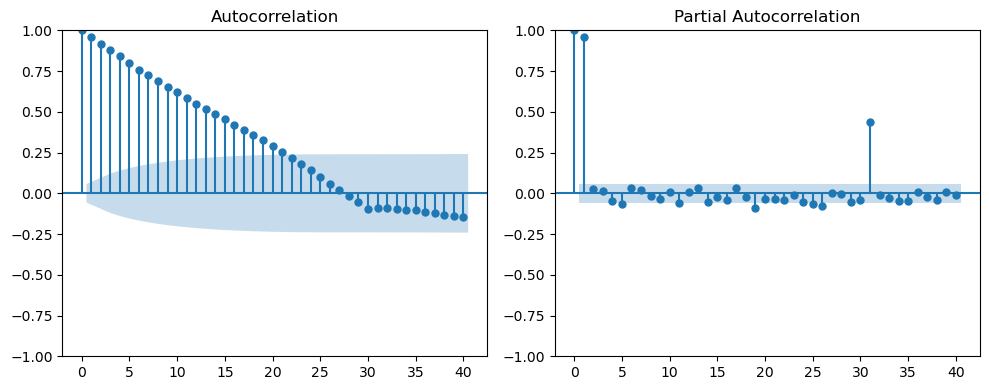

/home/ozodbek/anaconda3/envs/master_thesis_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ozodbek/anaconda3/envs/master_thesis_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ozodbek/anaconda3/envs/master_thesis_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:     lagged_rolling_std_delta_daily   No. Observations:                 1196
Model:                             ARIMA(1, 0, 1)   Log Likelihood                1964.784
Date:                            Sun, 24 Sep 2023   AIC                          -3921.568
Time:                                    09:10:03   BIC                          -3901.222
Sample:                                         0   HQIC                         -3913.903
                                           - 1196                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.861e-05      0.032      0.003      0.998      -0.063       0.063
ar.L1          0.9595      0.007   

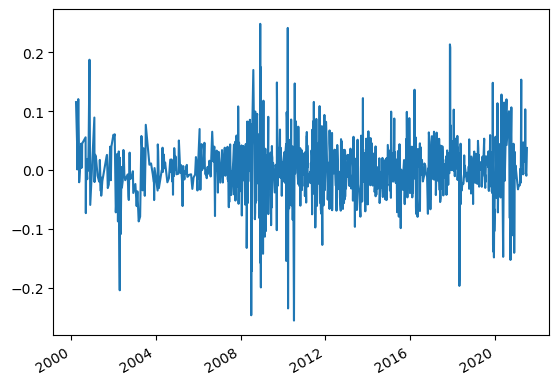

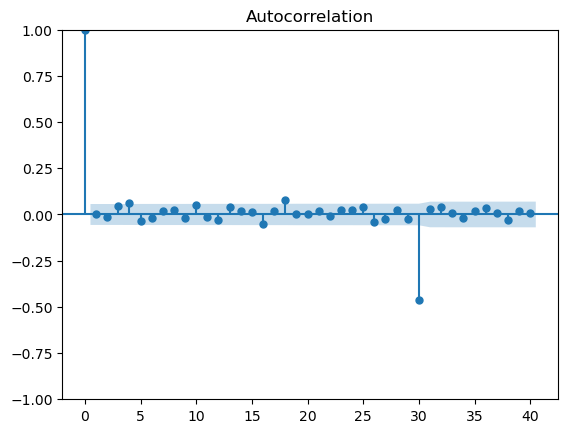

In [20]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Step 1: Check for Stationarity
result = adfuller(cleaned_df['lagged_rolling_std_delta_daily'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value is less than 0.05, the series is stationary. If not, you'd typically difference the series.

# Step 2: Identify Model Order
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sm.graphics.tsa.plot_acf(cleaned_df['lagged_rolling_std_delta_daily'], lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(cleaned_df['lagged_rolling_std_delta_daily'], lags=40, ax=ax[1])
plt.tight_layout()
plt.show()

# Based on the plots, choose an appropriate order for AR and MA.

model = sm.tsa.ARIMA(cleaned_df['lagged_rolling_std_delta_daily'], order=(1, 0, 1))
results = model.fit()
print(results.summary())

# Step 4: Examine Residuals
residuals = results.resid
residuals.plot()
plt.show()

sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()


In [21]:
# Directional change for sentiment
gen_data['sentiment_direction'] = gen_data['weighted_prob'].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Directional change for VSTOXX index (assuming you've already computed 'delta_daily' as day-over-day change)
vstoxx_df['vstoxx_direction'] = vstoxx_df['delta_daily'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Merge datasets
merged_df = pd.merge(gen_data, vstoxx_df, left_on='date', right_on='Date', how='inner')

# Compare the direction
merged_df['direction_match'] = (merged_df['sentiment_direction'] == merged_df['vstoxx_direction']).astype(int)

# Calculate the agreement percentage
agreement_percentage = 100 * merged_df['direction_match'].sum() / len(merged_df)
print(f"Agreement Percentage: {agreement_percentage:.2f}%")


Agreement Percentage: 50.04%


In [22]:
def compute_agreement_with_lag(sentiment_data, vstoxx_data, lag):
    # Ensure 'date' is a regular column, not an index
    sentiment_data = sentiment_data.reset_index()
    
    sentiment_data['lagged_direction'] = sentiment_data['sentiment_direction'].shift(lag)
    
    # Merging data
    merged_data = pd.merge(sentiment_data[['date', 'lagged_direction']], 
                           vstoxx_data[['Date', 'vstoxx_direction']], 
                           left_on='date', right_on='Date', how='inner')
    
    # Computing agreement
    agreement = np.mean(merged_data['lagged_direction'] == merged_data['vstoxx_direction'])
    
    return agreement


gen_data_reset = gen_data.reset_index()
vstoxx_df_reset = vstoxx_df.reset_index()
# Looping through various lags and computing agreement
max_lag = 30  # Check lags up to 30 days, but you can adjust this number as needed
agreements = {}
for lag in range(1, max_lag+1):
    agreements[lag] = compute_agreement_with_lag(sentiment_data=gen_data_reset, vstoxx_data=vstoxx_df_reset, lag=lag)

# Identify the lag with highest agreement
best_lag = max(agreements, key=agreements.get)
print(f"The best lag is {best_lag} days with an agreement percentage of {agreements[best_lag]*100:.2f}%")


The best lag is 17 days with an agreement percentage of 51.96%


# VAR

In [23]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")


In [24]:
from statsmodels.tsa.api import VAR

model = VAR(cleaned_df[['lagged_rolling_std_delta_daily', 'longer_rolling_weighted_prob']])
results = model.fit(maxlags=15, ic='aic')
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 24, Sep, 2023
Time:                     09:10:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.2701
Nobs:                     1195.00    HQIC:                  -12.2861
Log likelihood:           3961.41    FPE:                4.57145e-06
AIC:                     -12.2957    Det(Omega_mle):     4.54859e-06
--------------------------------------------------------------------
Results for equation lagged_rolling_std_delta_daily
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                    -0.000139         0.001355           -0.102           0.919
L1.lagged_rolling_std_delta_daily         0.953619      

/home/ozodbek/anaconda3/envs/master_thesis_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
print(gen_data.index.name)


date


In [26]:
import yfinance as yf
import pandas as pd

# Start by defining the tickers for the financial instruments we want.
# In this case, we're interested in the STOXX Europe 600 Banks and the Euro STOXX 50.
stoxx_600_banks_ticker = "^SX7P"  # This represents the STOXX Europe 600 Banks.
stoxx_50_ticker = "^STOXX50E"     # This represents the Euro STOXX 50.

# Next, we're going to fetch the data from Yahoo Finance.
# We'll specify our desired start and end dates to ensure we're getting the right data range.
start_date = "1999-01-01"
end_date = "2022-12-31"

# Fetch the data for each ticker.
# The 'download' function will retrieve the data for the specified date range.
stoxx_600_banks_data = yf.download(stoxx_600_banks_ticker, start=start_date, end=end_date)
stoxx_50_data = yf.download(stoxx_50_ticker, start=start_date, end=end_date)

# Merge the two data sets on their Date index
financial_data = pd.merge(stoxx_600_banks_data[['Close']], stoxx_50_data[['Close']], left_index=True, right_index=True, how='inner')

# Rename the columns for clarity
financial_data.columns = ['STOXX_600_Banks_Close', 'STOXX_50_Close']

# Reset the index so that 'Date' becomes a column
financial_data.reset_index(inplace=True)
financial_data.rename(columns={'index': 'Date'}, inplace=True)

# Print out the first few rows of the consolidated data
print(financial_data.head())
# NOTE: If you later decide to add data for Eurozone government bond yields or any other financial instruments, 
# you can fetch and add them to this dataframe in a similar manner.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  STOXX_600_Banks_Close  STOXX_50_Close
0 2013-03-05             173.279999     2683.020020
1 2013-03-06             171.369995     2679.889893
2 2013-03-07             171.119995     2690.850098
3 2013-03-08             175.490005     2728.780029
4 2013-03-11             174.350006     2718.709961


In [27]:
import pandas as pd
import numpy as np

# Ensure both dataframes have date columns with the same name for merging
financial_data.rename(columns={'Date': 'date'}, inplace=True)

# Merging on the 'date' column
merged_data = pd.merge(gen_data, financial_data, on='date', how='inner')

# Taking first differences to make data stationary
merged_data['stoxx_600_banks_diff'] = merged_data['STOXX_600_Banks_Close'].diff()
merged_data['stoxx_50_diff'] = merged_data['STOXX_50_Close'].diff()

# Dropping the first row as it will have NaN values after differencing
merged_data.dropna(inplace=True)

# Determining the direction of change
merged_data['stoxx_600_banks_direction'] = np.sign(merged_data['stoxx_600_banks_diff'])
merged_data['stoxx_50_direction'] = np.sign(merged_data['stoxx_50_diff'])
merged_data['sentiment_direction'] = np.sign(merged_data['weighted_prob'])


In [28]:
def compute_agreement_with_lag(data, lag):
    data['lagged_sentiment_direction'] = data['sentiment_direction'].shift(lag)
    
    # Agreement for STOXX_600_Banks
    agreement_banks = np.mean(data['lagged_sentiment_direction'] == data['stoxx_600_banks_direction'])

    # Agreement for STOXX_50
    agreement_50 = np.mean(data['lagged_sentiment_direction'] == data['stoxx_50_direction'])
    
    return agreement_banks, agreement_50

max_lag = 10
agreements = {}

for lag in range(1, max_lag+1):
    agreements[lag] = compute_agreement_with_lag(merged_data, lag)

# Identify the lag with highest agreement for each index
best_lag_banks = max(agreements, key=lambda k: agreements[k][0])
best_lag_50 = max(agreements, key=lambda k: agreements[k][1])

print(f"Best lag for STOXX 600 Banks: {best_lag_banks} with agreement: {agreements[best_lag_banks][0]*100:.2f}%")
print(f"Best lag for STOXX 50: {best_lag_50} with agreement: {agreements[best_lag_50][1]*100:.2f}%")


Best lag for STOXX 600 Banks: 3 with agreement: 51.52%
Best lag for STOXX 50: 7 with agreement: 52.05%


: 

: 

: 